#### Prakticni deo seminarskog rada "___Kvalitet podataka___" iz predmeta __Prikupljanje i predobrada podataka za Masinsko ucenje__

__Nastasija Stankovic 1622__

U njemu ce biti predstavljeni prakticni primeri na temu:    
__*raspodela podataka__     
__*mere centralne tendencije__     
__*korelacija__    
__*varijansa__    

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Prvi dataset

Dataset: https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

14 kontinualnih atributa: Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4   
2 integer atributa: Area i ConvexArea   
1 kategoricki: Class   
   

In [273]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx') 

In [274]:
print("Shape:",data.shape) 
data.head(10)

Shape: (13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [275]:
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [276]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [277]:
dups = data.duplicated()
print("Broj duplikata pre brisanja:", dups.sum())
data.drop_duplicates(inplace=True)
print("Broj duplikata posle brisanja:", data.duplicated().sum())

Broj duplikata pre brisanja: 68
Broj duplikata posle brisanja: 0


In [278]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


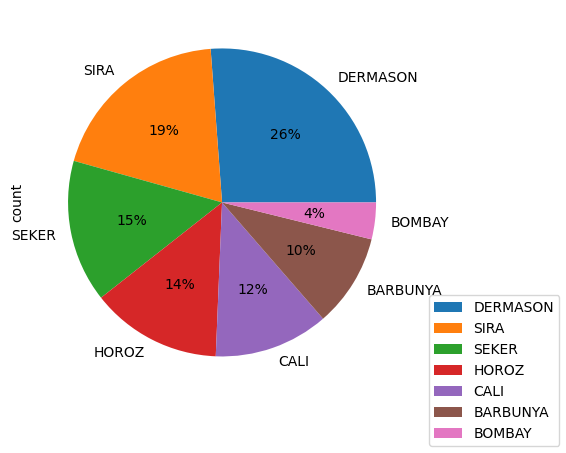

In [279]:
plt.figure(figsize=(7, 5))
pie = data.Class.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()

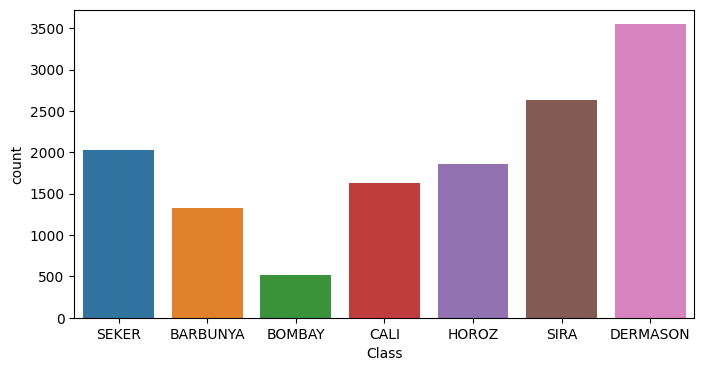

In [280]:
plt.figure(figsize=(8,4))
sns.countplot(x='Class',data=data)
plt.show()

Primećuje se da nije jednaka raspodela podataka kroz svih sedam klasa pasulja, te se očekuje da će biti potrebno primeniti tehnike za balansiranje dataset-a.

In [281]:
def print_attribute_ranges(dataframe):
    for column in dataframe.columns:
        if column != "Class":
            column_range = dataframe[column].min(), dataframe[column].max()
            print(f"{column} range: {column_range}")

Provera opsega atributa

In [282]:
print_attribute_ranges(data)

Area range: (20420, 254616)
Perimeter range: (524.736, 1985.37)
MajorAxisLength range: (183.6011650038393, 738.8601534818813)
MinorAxisLength range: (122.51265345074418, 460.1984968278401)
AspectRation range: (1.0248675960667681, 2.430306446836626)
Eccentricity range: (0.21895126335356507, 0.9114229684680053)
ConvexArea range: (20684, 263261)
EquivDiameter range: (161.24376423134018, 569.3743583287609)
Extent range: (0.55531471681117, 0.8661946405648266)
Solidity range: (0.9192461570857022, 0.9946774999456888)
roundness range: (0.4896182562412148, 0.9906853996160323)
Compactness range: (0.6405767589768725, 0.9873029693778109)
ShapeFactor1 range: (0.0027780126683855494, 0.010451169324378654)
ShapeFactor2 range: (0.0005641690180332927, 0.0036649719644516834)
ShapeFactor3 range: (0.41033858414131424, 0.9747671533422431)
ShapeFactor4 range: (0.9476874027098624, 0.9997325300471389)


array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

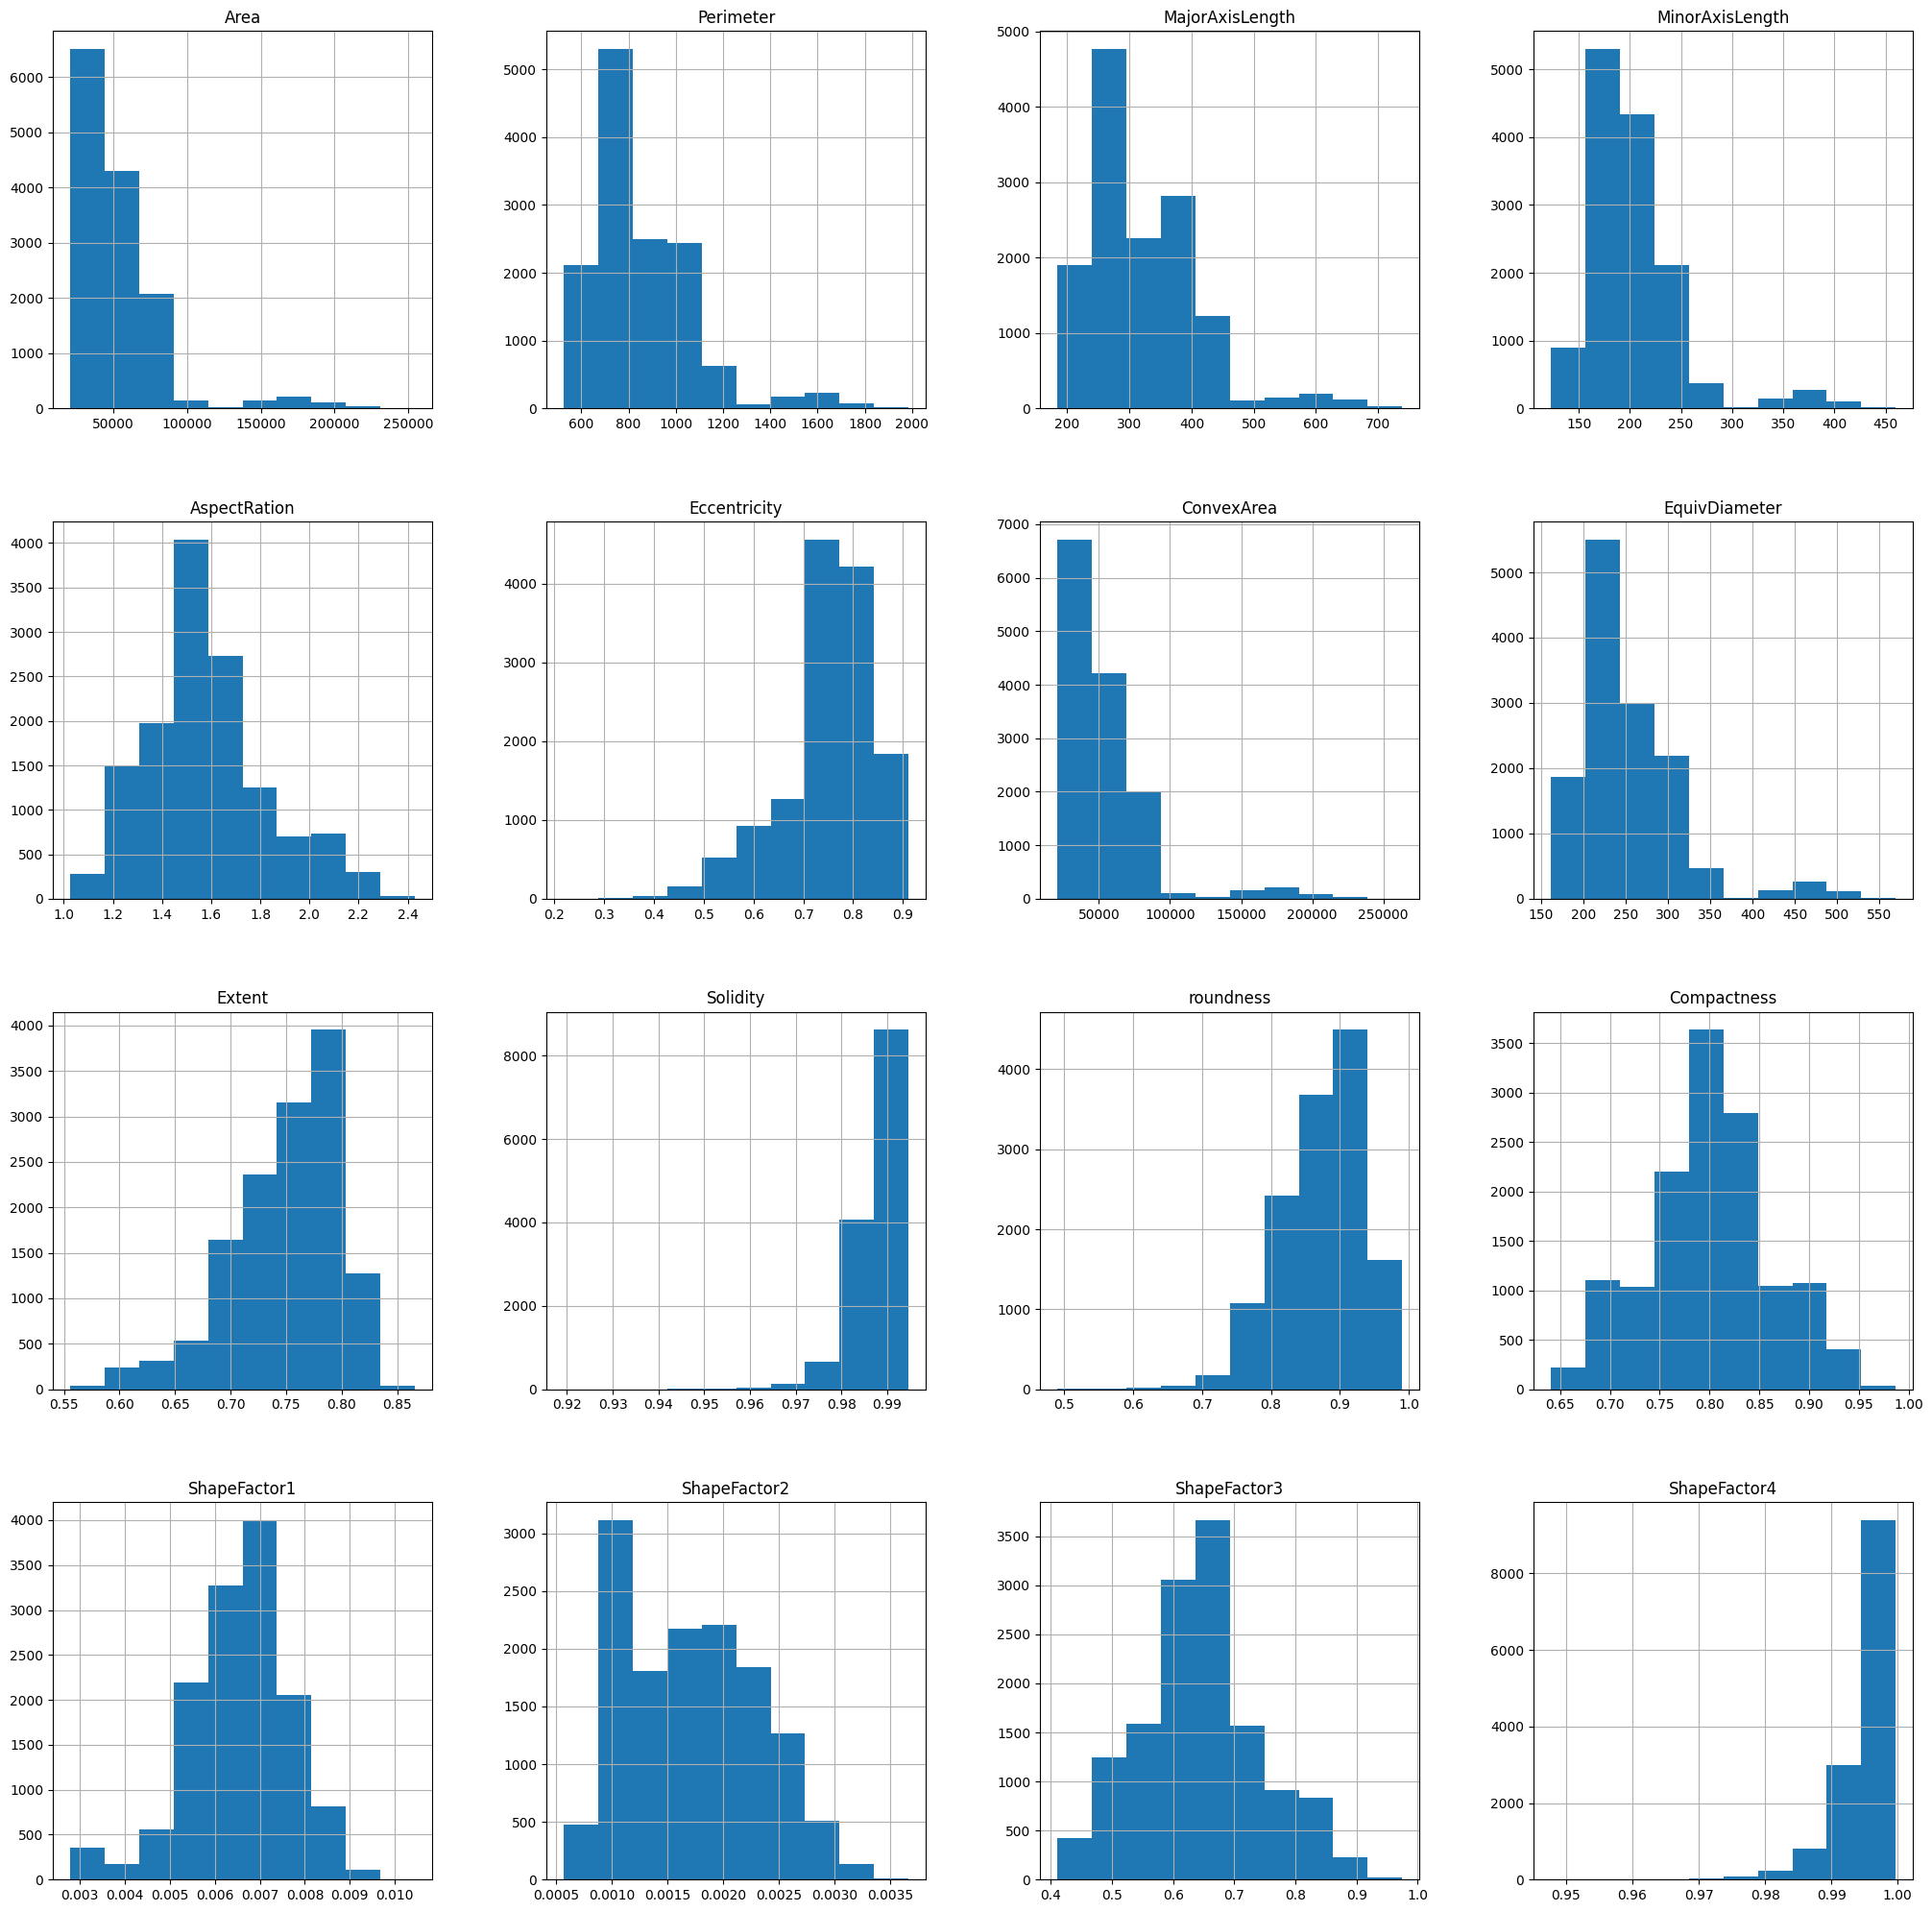

In [283]:
data.hist(figsize = (25,25))

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

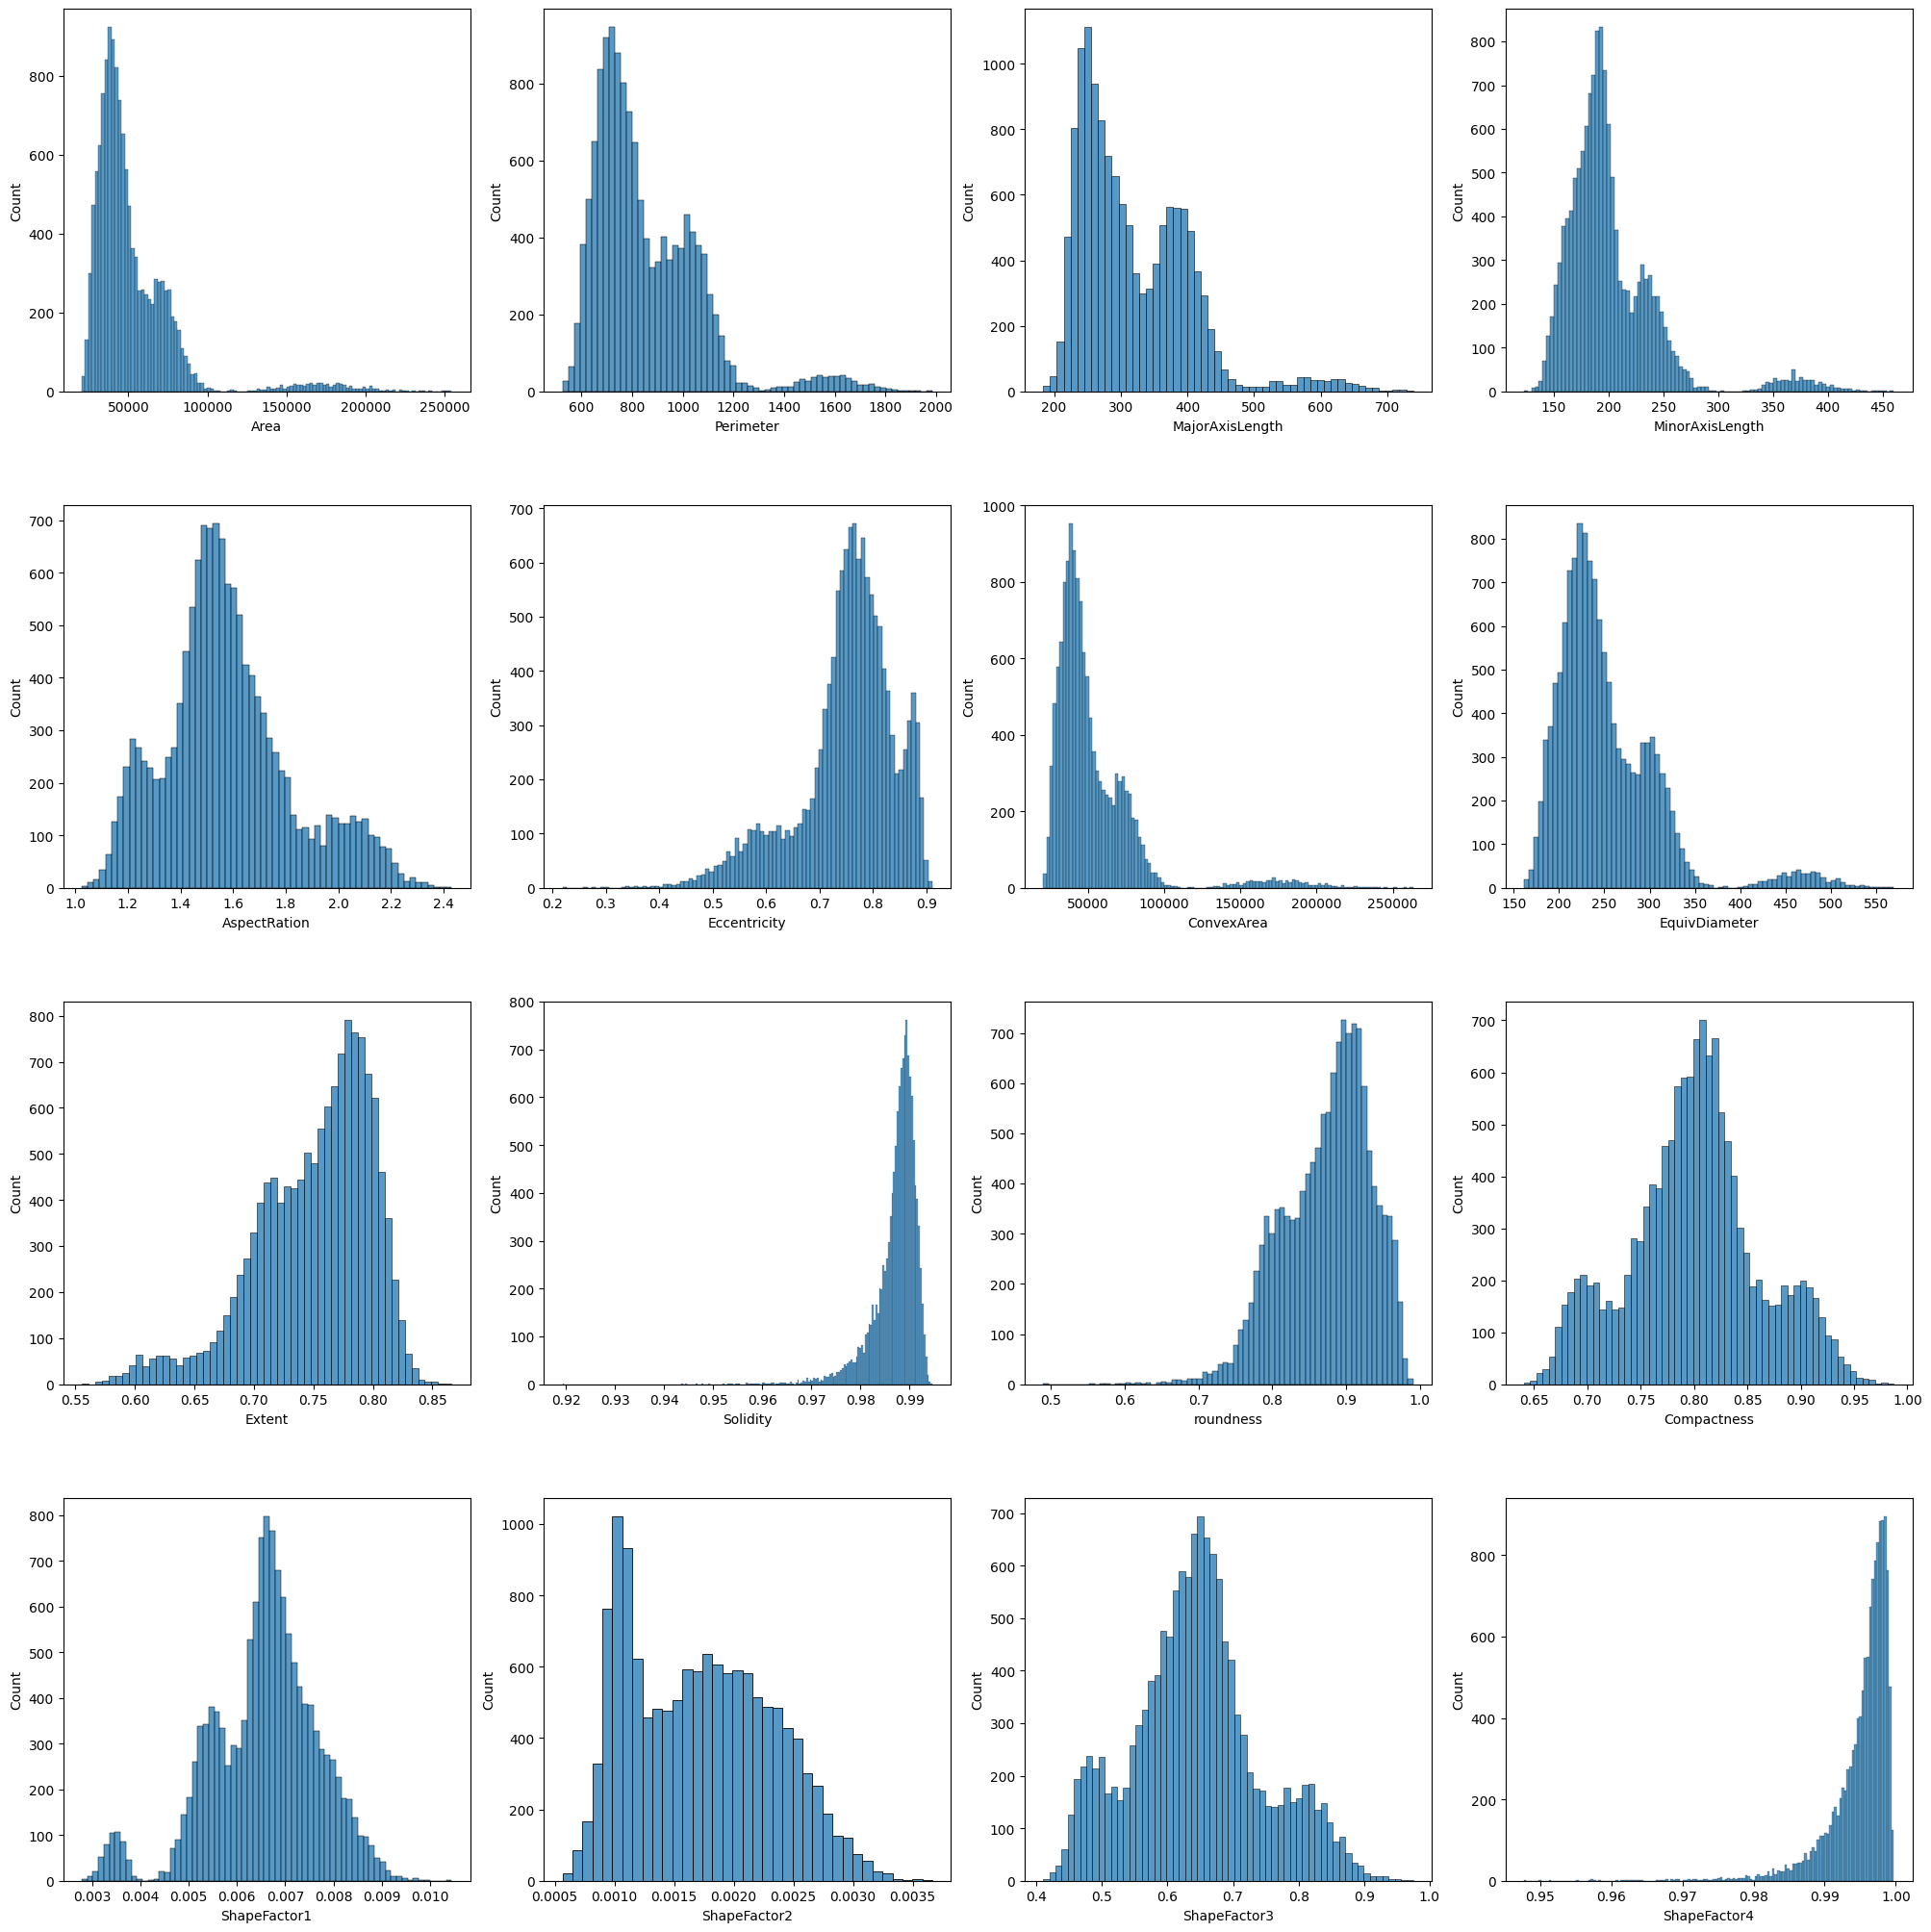

In [284]:
X = data.drop(['Class'], axis=1)
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

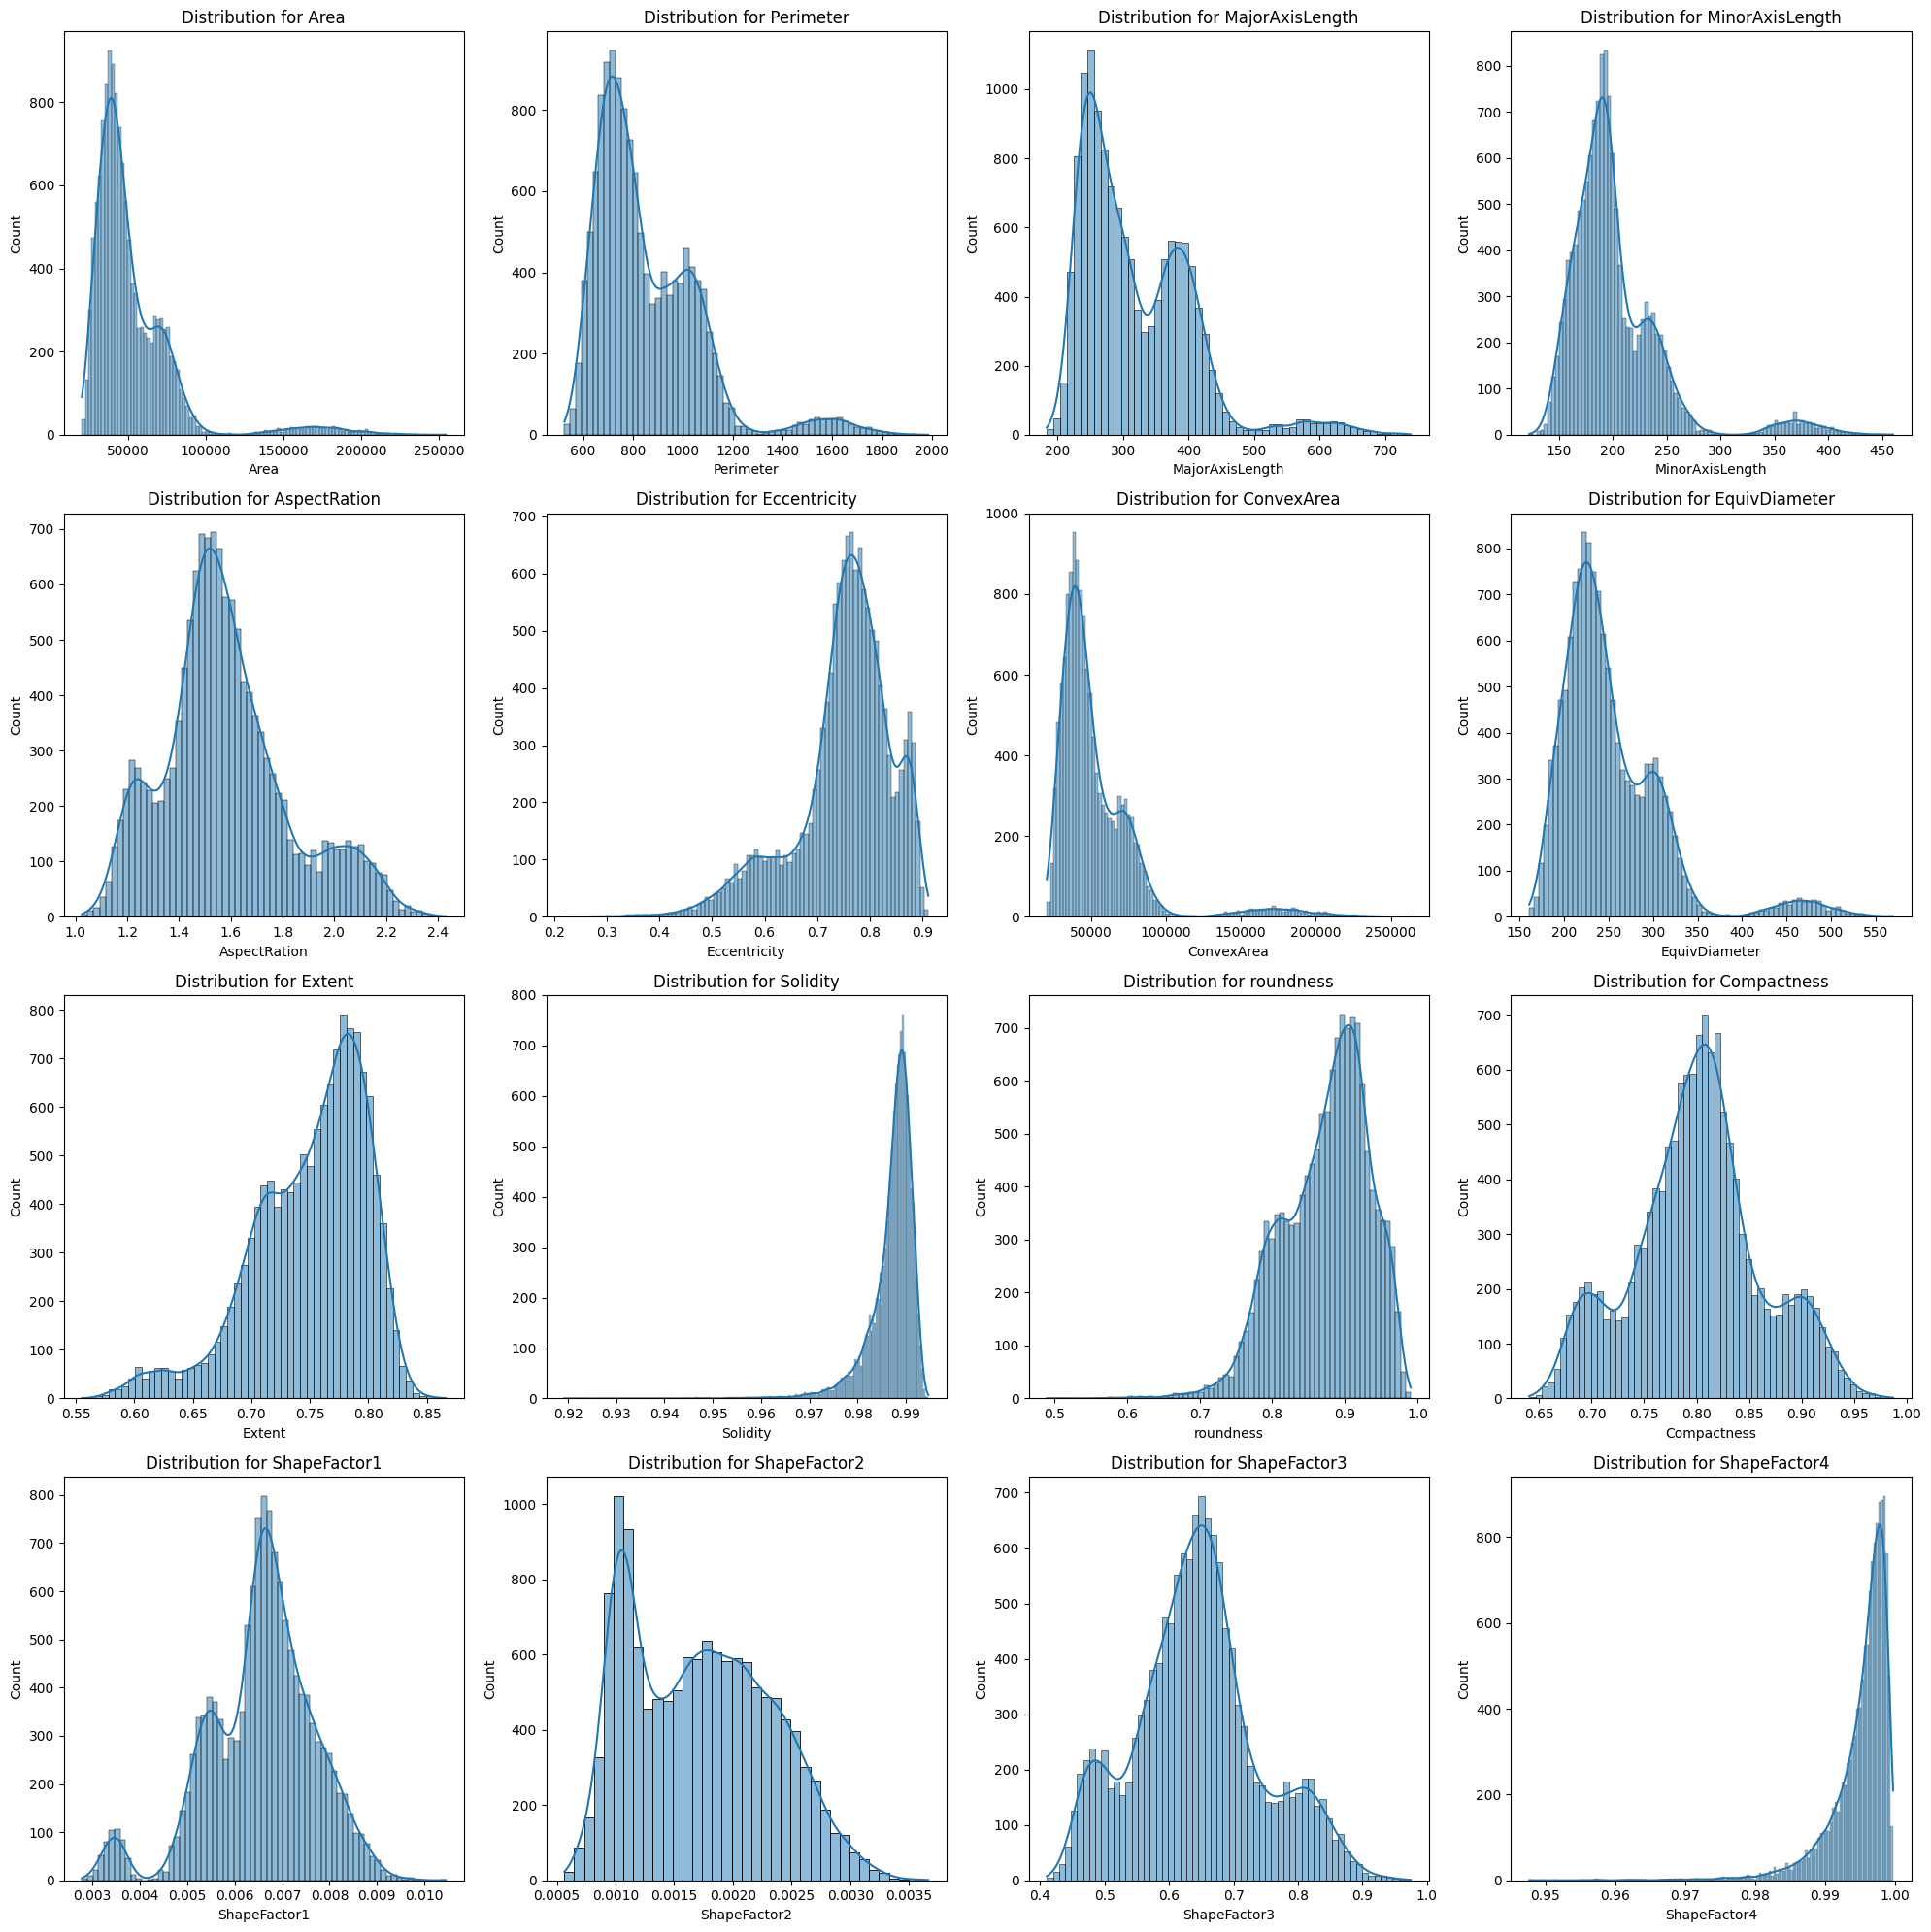

In [285]:
plt.figure(figsize=(20, 20))
columns_to_plot = data.columns[:-1]  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)
    sns.histplot(x=column, data=data, kde=True)
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

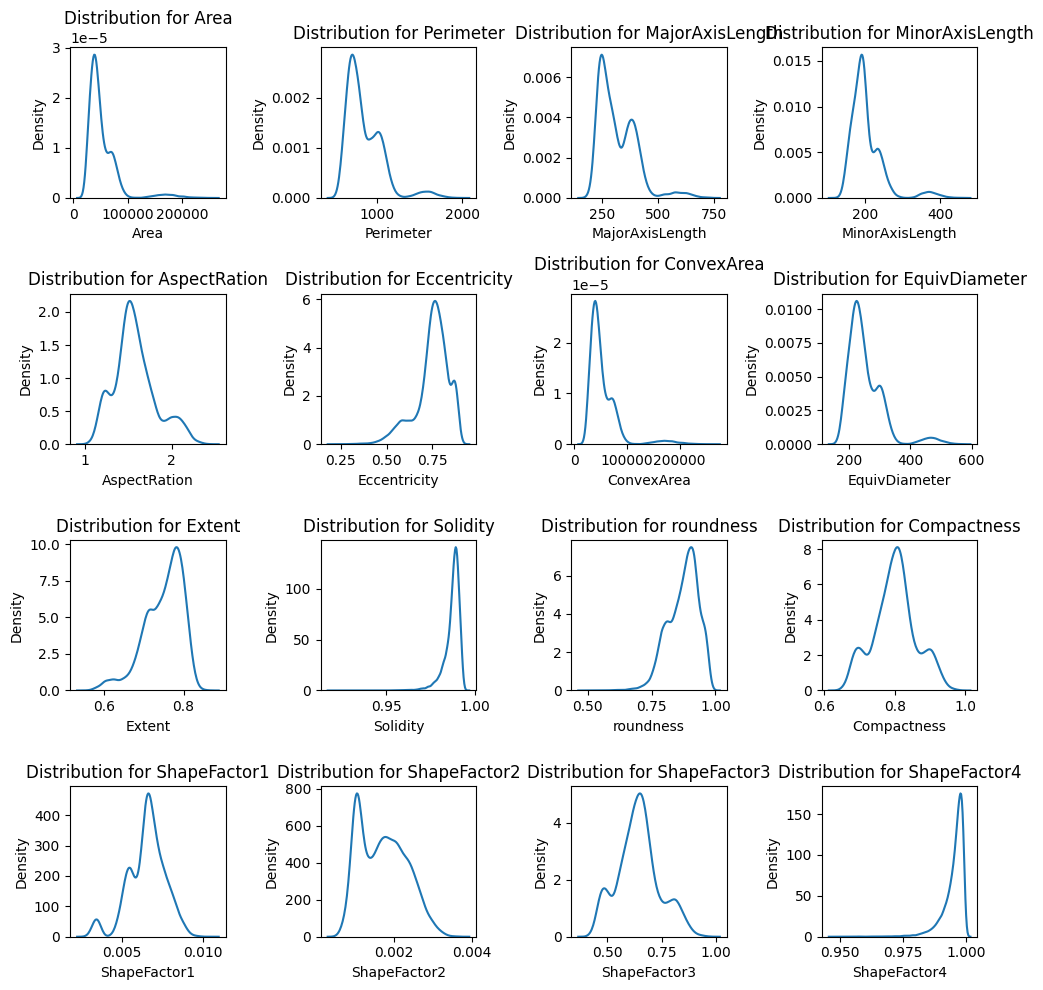

In [286]:
plt.figure(figsize=(10, 10))
columns_to_plot = data.columns[:-1]  

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(x=column, data=data)
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()

Iz raspodele zakljucujemo:   

1. Za Area primecuje se desno kosenje asimetricne krive.    
2. Za Perimetar primecuje se desno kosenje asimetricne krive.    
3. Za MajorAxisLength primecuje se bimodalna raspodela sa dva vrha.    
4. Za MinorAxisLength primecuje se desno kosenje asimetricne krive.    
5. Za AspectRatio imamo Poasonovu raspodelu podataka.    
6. Za Eccentricity imamo levo kosenje asimetricne krive.    
7. Za ConvexArea i EquivDiameter imamo desno kosenje asimetricne krive.    
8. Za Extent imamo Poasonovu raspodelu.    
9. Za Solidity imamo eksponencijalnu raspodelu.    
10. Za Roundness imamo levo kosenje asimetricne krive.    
11. Za Compactness imamo normalnu odnosno Gausovu distribuciju    
12. Za ShapeFactor1 imamo bimodalnu raspodelu sa tri vrha.    
12. Za  ShapeFacotr2 imamo bimodalnu raspodelu sa dva vrha     
12. Za ShapeFactori3 imamo Gausovu raspodelu.    
13. Za ShapeFactor4 imamo eksponencijalnu raspodelu.     


__Na osnovu raspodele podataka mozemo izvrsiti odredjene transformacije i dobiti približno normalnu distribuciju. Ove transformacije mogu smanjiti varijabilnost podataka i učiniti ih simetričnijim.__

Primenjujemo log transformaciju

In [287]:
X = data.drop(['Class'], axis=1)
col = X.columns

data[col] = np.log1p(data[col])

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

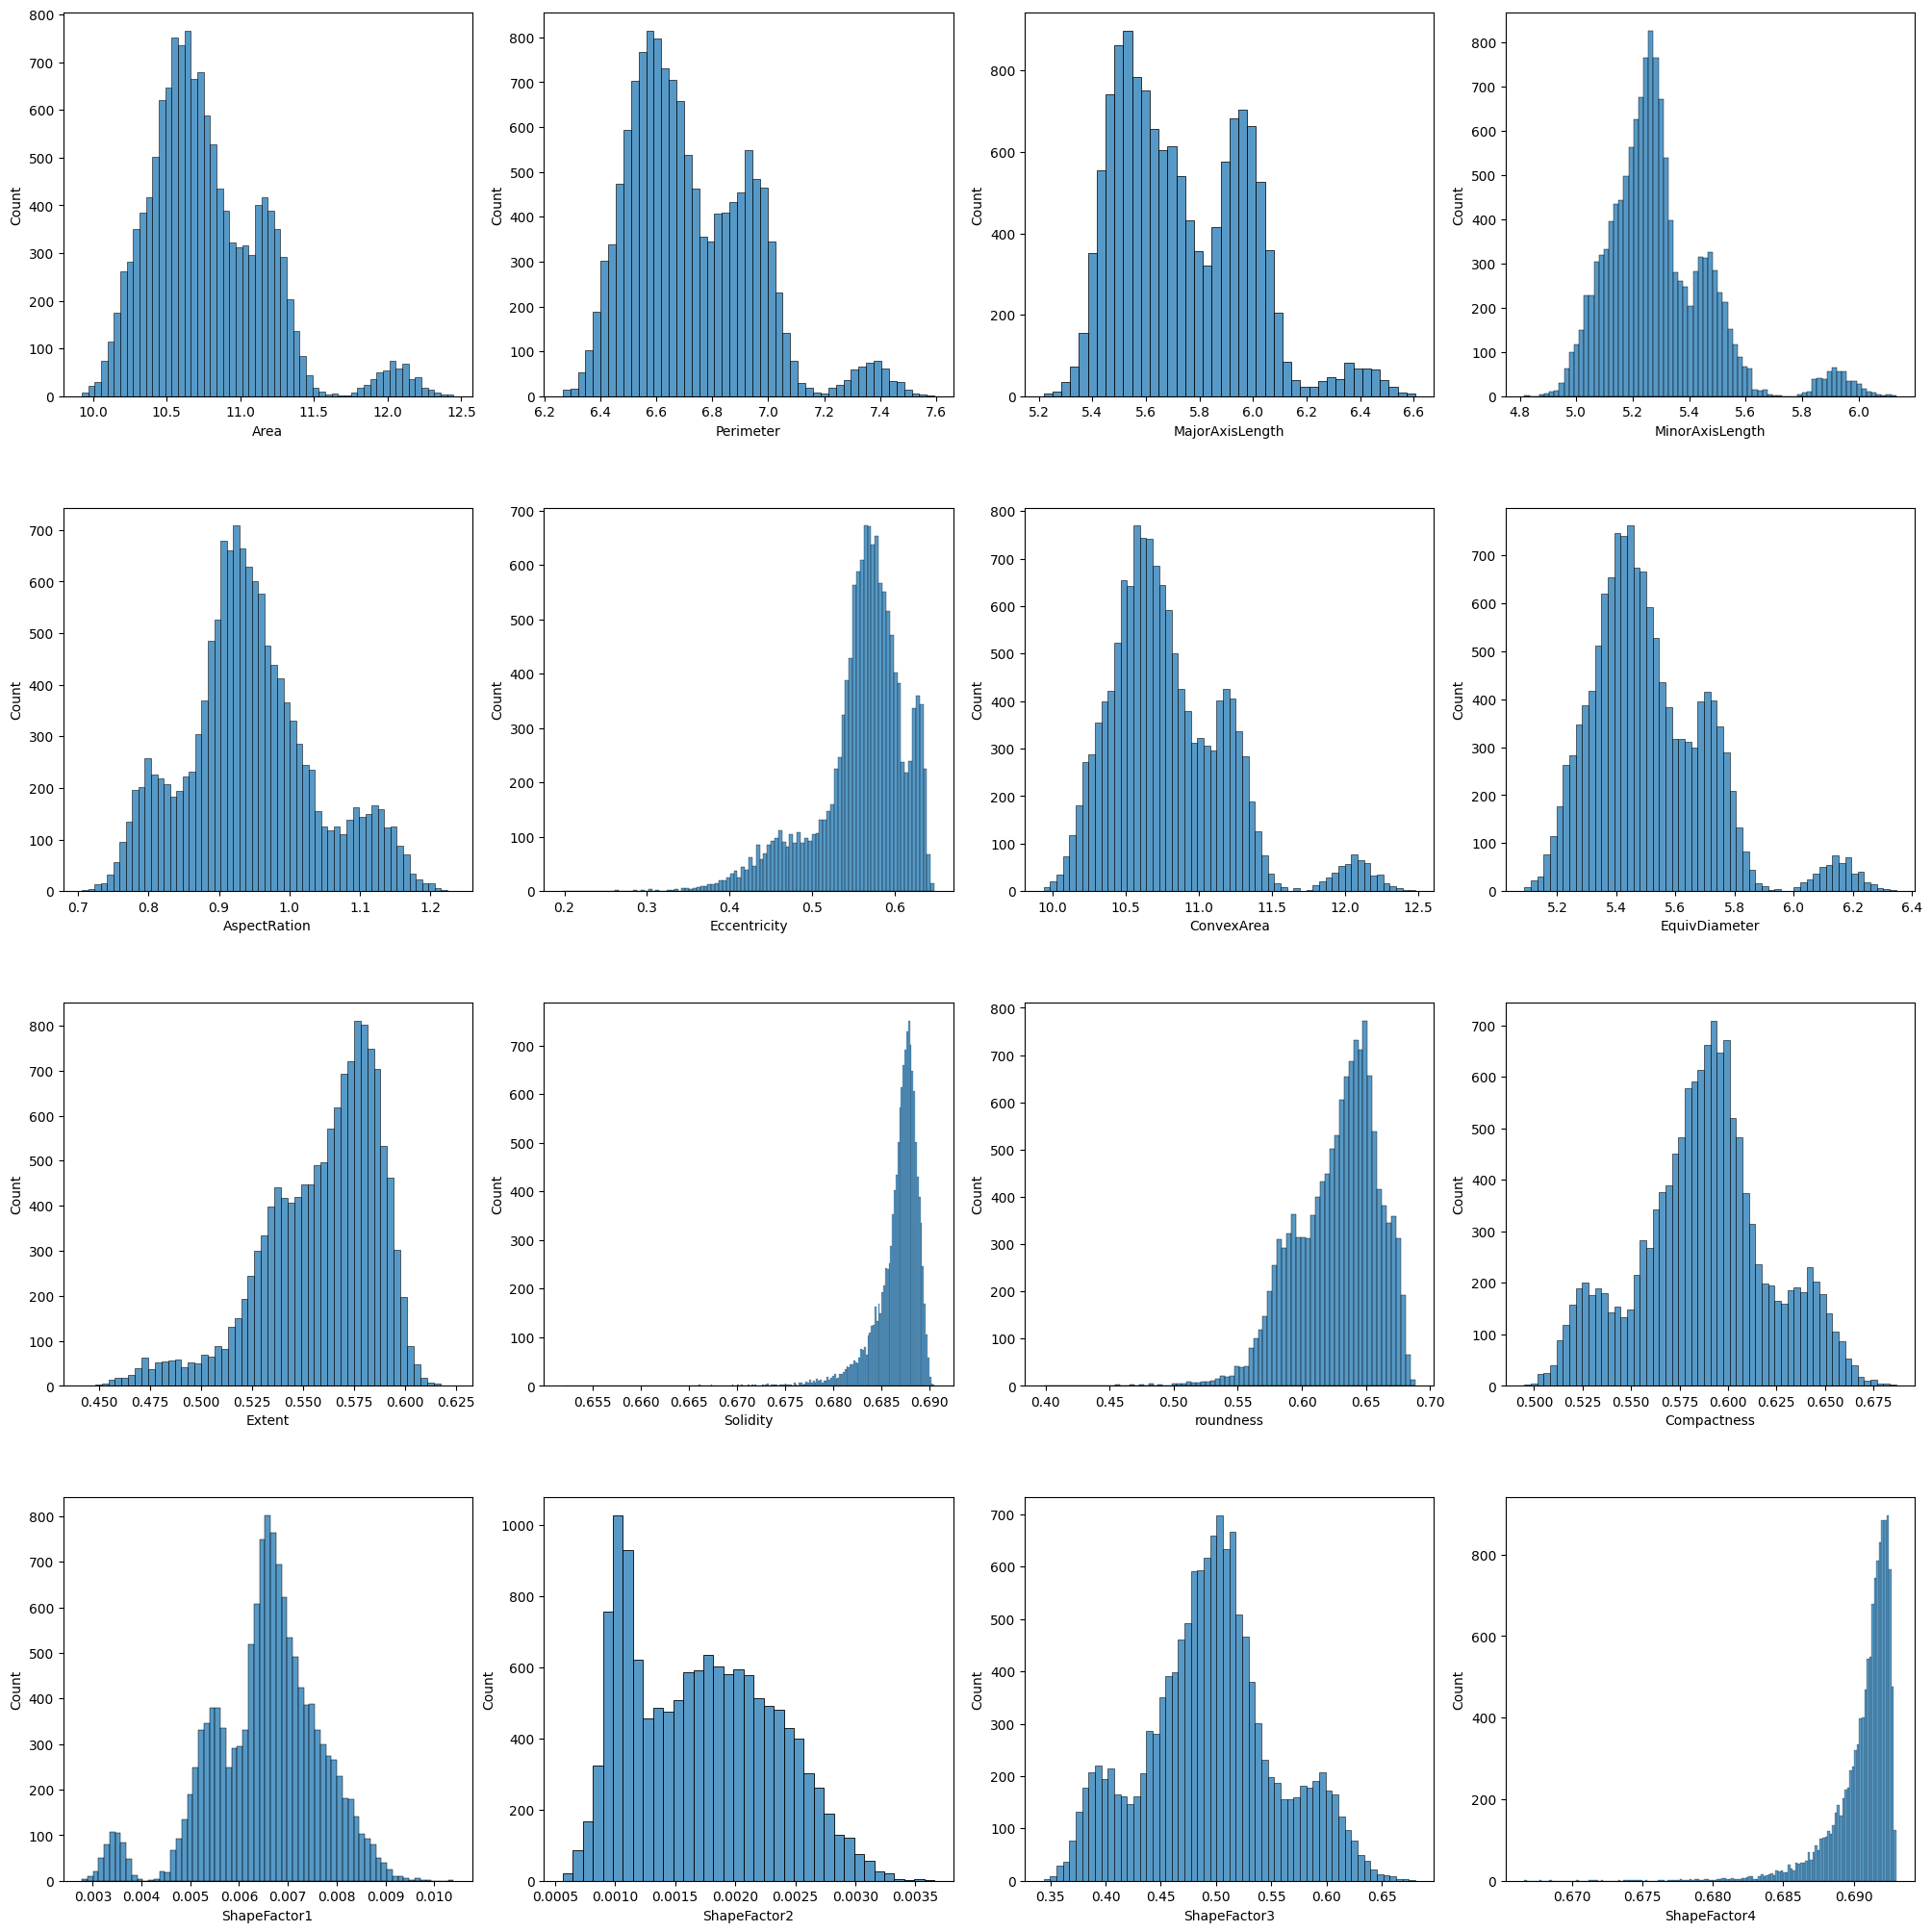

In [288]:
X = data.drop(['Class'], axis=1)
fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
index = 0

axs = axs.flatten()
for k, v in X.items():
     sns.histplot(v, ax = axs[index])
     index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

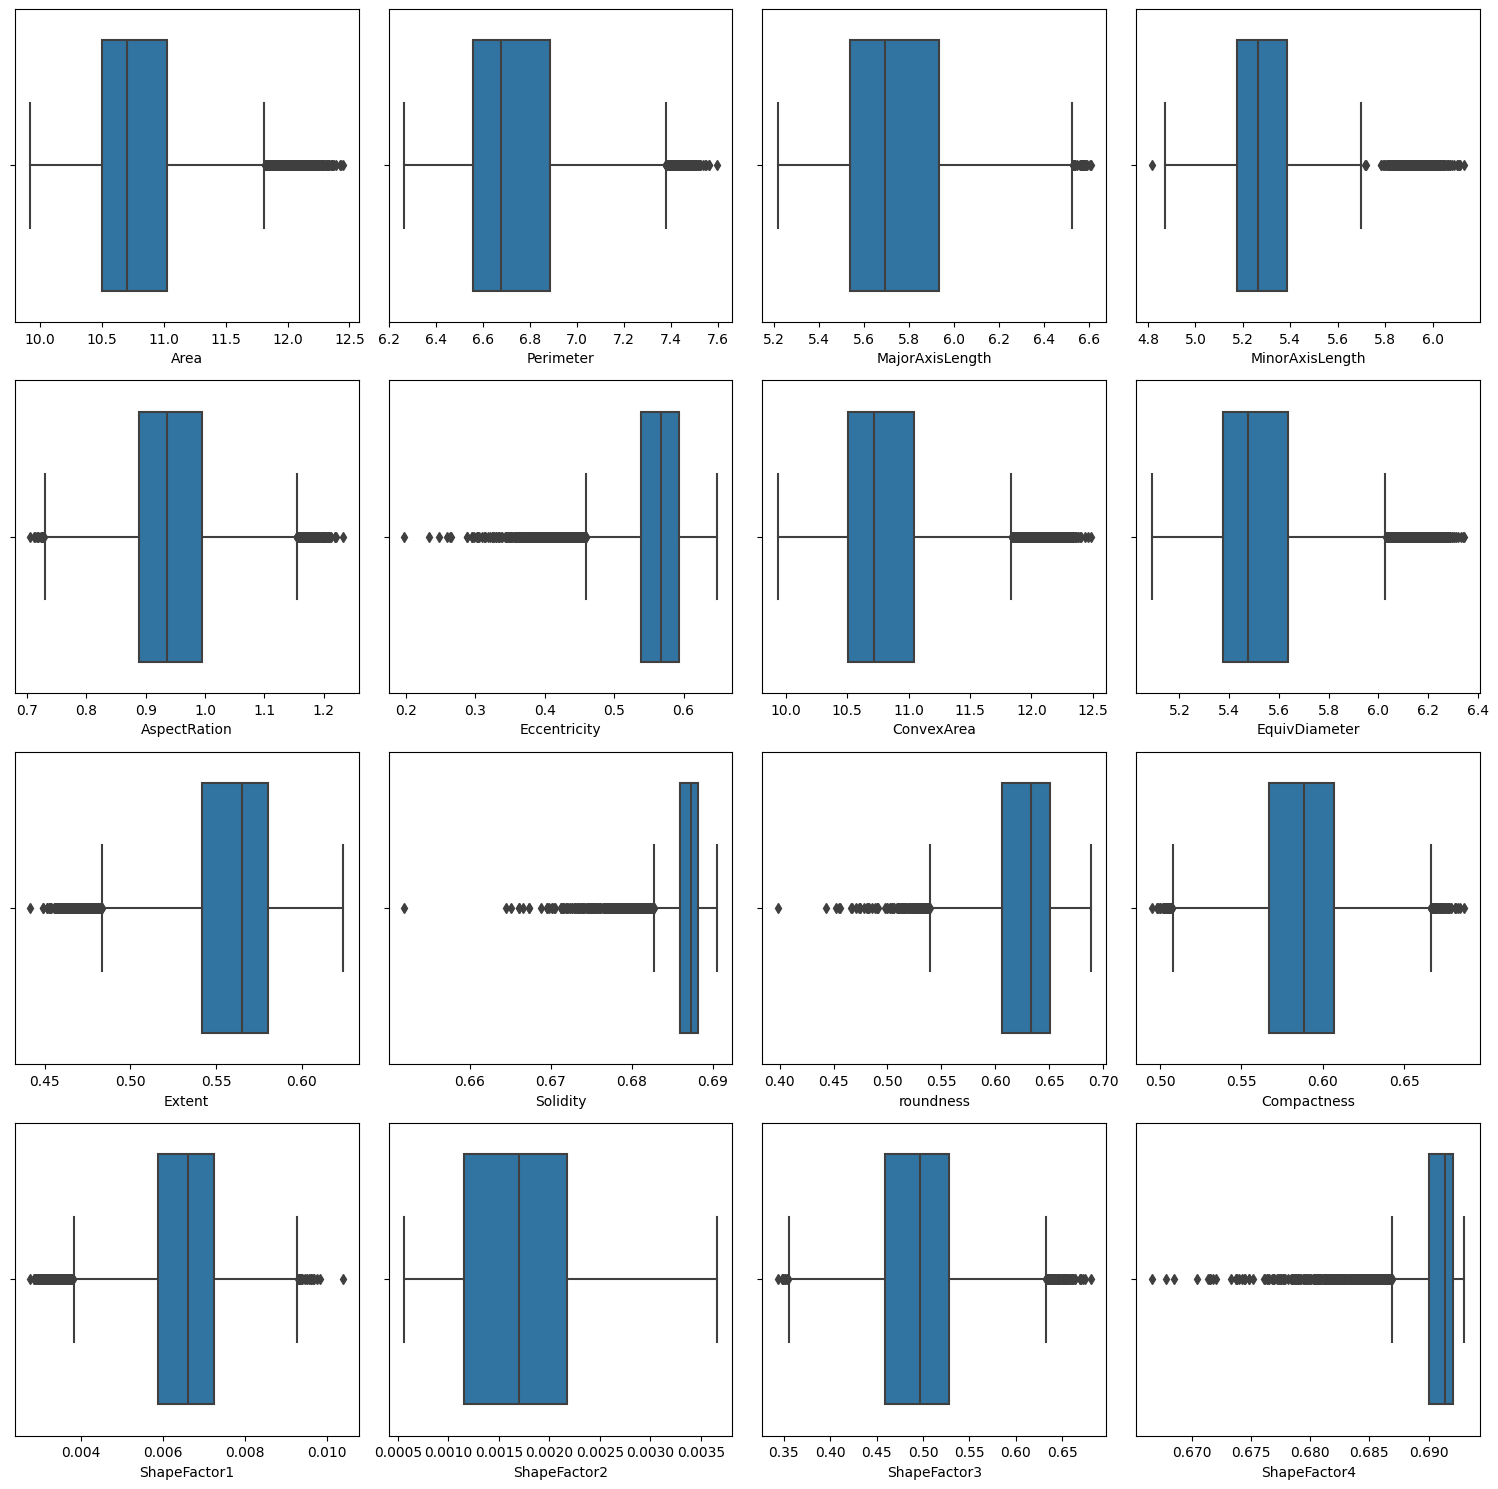

In [289]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(data.columns):
    if column != 'Class' and idx < 17:  
        sns.boxplot(x=data[column], ax=axes[idx])
        
plt.tight_layout()
plt.show()

Na osnovu box plotova mozemo da zakljucimo da u datasetu postoji znacaj broj outliera i da bi dobra praksa bila isprobavanje vise metoda za izbacivanje outliera.

__One-hot-Encoding Class kolone__

In [290]:
print(np.unique(data.Class))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [291]:
class_mapping = {
    'BARBUNYA': 0,
    'BOMBAY': 1,
    'CALI': 2,
    'DERMASON': 3,
    'HOROZ': 4,
    'SEKER': 5,
    'SIRA': 6
}

data['Class'] = data['Class'].replace(class_mapping)

In [292]:
data.mean(numeric_only=True)

Area               10.779784
Perimeter           6.725348
MajorAxisLength     5.739649
MinorAxisLength     5.295051
AspectRation        0.943801
Eccentricity        0.558358
ConvexArea         10.792727
EquivDiameter       5.514778
Extent              0.559120
Solidity            0.686700
roundness           0.627390
Compactness         0.587399
ShapeFactor1        0.006539
ShapeFactor2        0.001718
ShapeFactor3        0.495548
ShapeFactor4        0.690681
Class               3.530311
dtype: float64

Prosečne vrednosti pružaju informaciju o centralnom položaju distribucije podataka. Visoke srednje vrednosti mogu ukazivati na prisustvo ekstremnih vrednosti ili asimetrične distribucije, dok niske srednje vrednosti mogu ukazivati na to da su podaci koncentrisani oko manjih vrednosti.

In [293]:
data.median(numeric_only=True)

Area               10.705063
Perimeter           6.678211
MajorAxisLength     5.695093
MinorAxisLength     5.265232
AspectRation        0.936039
Eccentricity        0.567582
ConvexArea         10.717147
EquivDiameter       5.477491
Extent              0.565259
Solidity            0.687274
roundness           0.633126
Compactness         0.588627
ShapeFactor1        0.006621
ShapeFactor2        0.001699
ShapeFactor3        0.496173
ShapeFactor4        0.691342
Class               3.000000
dtype: float64

 Ako je medijana bliska srednjoj vrednosti, to može ukazivati na simetričnu distribuciju podataka. Ako je medijana značajno različita od srednje vrednosti, to može ukazivati na asimetriju ili prisustvo ekstremnih vrednosti.

In [294]:
data.mode(axis=0).head(1)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,10.244343,6.528456,5.218198,4.816344,0.705504,0.197991,10.519322,5.248207,0.526043,0.686624,0.39852,0.495048,0.002774,0.000564,0.34383,0.666643,3.0


Modalne vrednosti su korisne jer pružaju uvid u najčešće vrednosti atributa u datasetu.Ako je vrednost bliska srednjoj vrednosti, to može ukazivati na simetričnu distribuciju podataka. Ako načajno odstupa od srednje vrednosti, to može ukazivati na prisustvo nepravilnosti u distribuciji podataka, poput višestrukih pikova ili asimetrije. 

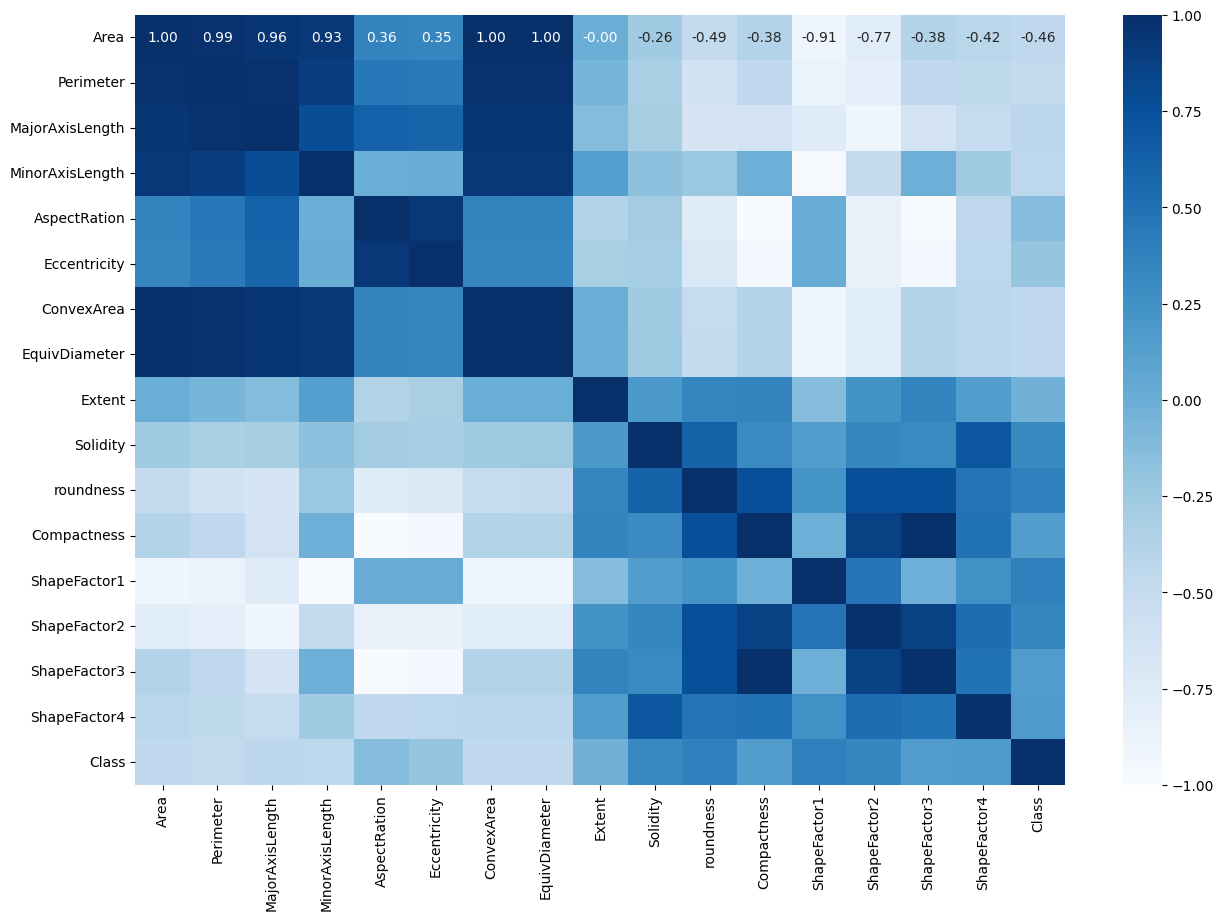

In [295]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data.corr().round(2), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()


Na osnovu matrice korelacije, može se zaključiti da pojedini fičeri imaju medjusobno visok nivo korelacije (Convex Area, Area, Perimeter, MajorAxisLength, MinorAxisLength i EquiDiameter su visoko korelisani fičeri), pa neki od ovih fičera mogu biti uklonjeni.

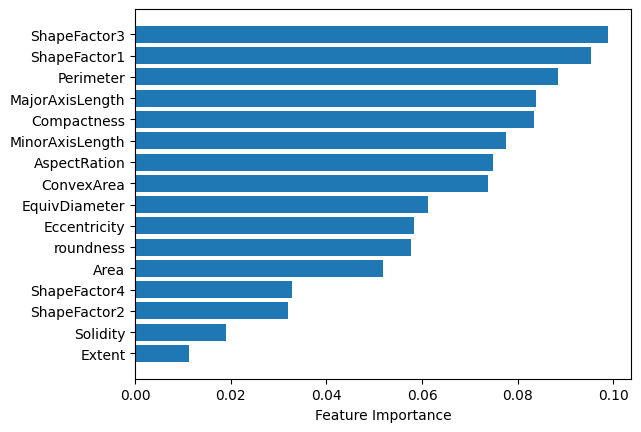

In [296]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = data.drop("Class", axis=1)  
y = data["Class"]

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.show()

In [297]:
data.var(numeric_only=True).round(2).sort_values()

Extent             0.00
Eccentricity       0.00
ShapeFactor3       0.00
ShapeFactor4       0.00
Solidity           0.00
roundness          0.00
Compactness        0.00
ShapeFactor1       0.00
ShapeFactor2       0.00
AspectRation       0.01
MinorAxisLength    0.04
EquivDiameter      0.04
Perimeter          0.05
MajorAxisLength    0.06
Area               0.17
ConvexArea         0.17
Class              3.36
dtype: float64

__Niske varijanse__: Atributi koji imaju varijanse bliske nuli ili vrlo male varijanse (npr. 0.00) su atributi čije vrednosti su veoma bliske međusobno ili konstantne. To znači da ovi atributi ne pružaju mnogo varijacije ili informacija u podacima.    

__Visoke varijanse__: Atributi sa većim varijansama (npr. 0.17) imaju veću varijabilnost u svojim vrednostima. To znači da postoje značajne razlike između vrednosti ovih atributa, što može biti korisno za modelovanje ili analizu podataka.   

Atributi "Area" i "ConvexArea" imaju najveće varijanse (0.17), što ukazuje na veću varijabilnost u površinama regiona koje oni predstavljaju u vašem datasetu. Sa druge strane, atributi poput "Extent", "Eccentricity" i "ShapeFactor3" imaju vrlo male varijanse (0.00), što sugeriše da su vrednosti ovih atributa veoma slične ili konstantne u celom datasetu.     

In [298]:
data.std(numeric_only=True).round(2).sort_values()

ShapeFactor4       0.00
Solidity           0.00
ShapeFactor1       0.00
ShapeFactor2       0.00
Extent             0.03
roundness          0.03
Compactness        0.03
Eccentricity       0.05
ShapeFactor3       0.06
AspectRation       0.09
MinorAxisLength    0.19
EquivDiameter      0.21
Perimeter          0.22
MajorAxisLength    0.24
Area               0.41
ConvexArea         0.41
Class              1.83
dtype: float64

__Niske standardne devijacije__: Atributi sa vrlo malim standardnim devijacijama (npr. 0.00) su atributi čije vrednosti su veoma bliske srednjoj vrednosti. To znači da su vrednosti ovih atributa konstantne ili veoma malo variraju.   

__Visoke standardne devijacije__: Atributi sa većim standardnim devijacijama (npr. 0.41) imaju veću varijabilnost u svojim vrednostima. To znači da postoje značajne razlike između vrednosti ovih atributa, a vrednosti mogu biti raštrkane dalje od srednje vrednosti.    

Atributi "Area" i "ConvexArea" imaju najveće standardne devijacije (0.41), što ukazuje na veću varijabilnost u njihovim vrednostima. Sa druge strane, atributi poput "ShapeFactor4", "Solidity" i "ShapeFactor1" imaju vrlo male standardne devijacije (0.00), što sugeriše da su vrednosti ovih atributa konstantne ili veoma malo variraju.

### Drugi dataset

Dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

11 integer atributa: age,balance,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed   
5 kategoricka atributa: job,marital,education,contact,poutcome	       
4 binarna atributa: default,housing,loan,y     
2 date atributa: month,day_of_week    

In [299]:
data2 = pd.read_csv('bank-additional-full.csv', sep=';')

In [300]:
print("Shape:",data2.shape) 
data2.head(10)

Shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [301]:
data2.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [302]:
data2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [303]:
numerical = ['duration', 'campaign', 'pdays', 'previous', 'age',
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

objects = ['marital', 'education', 'housing', 'default', 'loan',
           'contact', 'month', 'day_of_week', 'poutcome', 'job']

In [304]:
dups = data2.duplicated()
print("Broj duplikata pre brisanja:", dups.sum())
data2.drop_duplicates(inplace=True)
print("Broj duplikata posle brisanja:", data2.duplicated().sum())

Broj duplikata pre brisanja: 12
Broj duplikata posle brisanja: 0


In [305]:
data2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


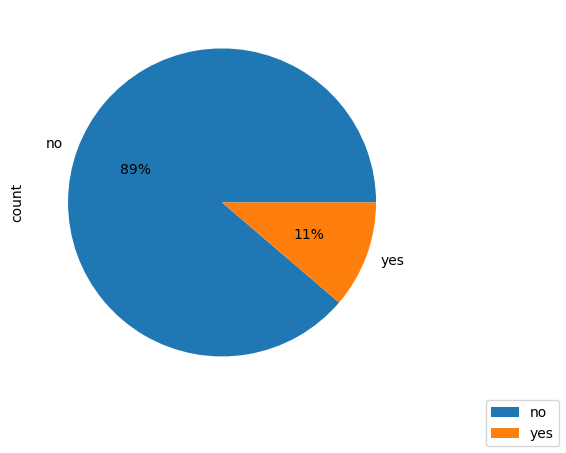

In [306]:
plt.figure(figsize=(7, 5))
pie = data2.y.value_counts().plot(kind='pie', autopct='%1.0f%%')
pie.figure.set_size_inches(7, 5)
pie.figure.legend(loc='lower right')
plt.show()

Primećujemo da je dataset veoma loše balansiran sa mnogo većim brojem primeraka koji pripadaju klasi no. Na osnovu ovoga možemo pretpostaviti da će verovatno biti potrebno korišćenje neke od dostupnih tehnika kojom će se izvršiti balansiranje dataseta.

__Vizualizacija raspodele kategorickih atributa__ :

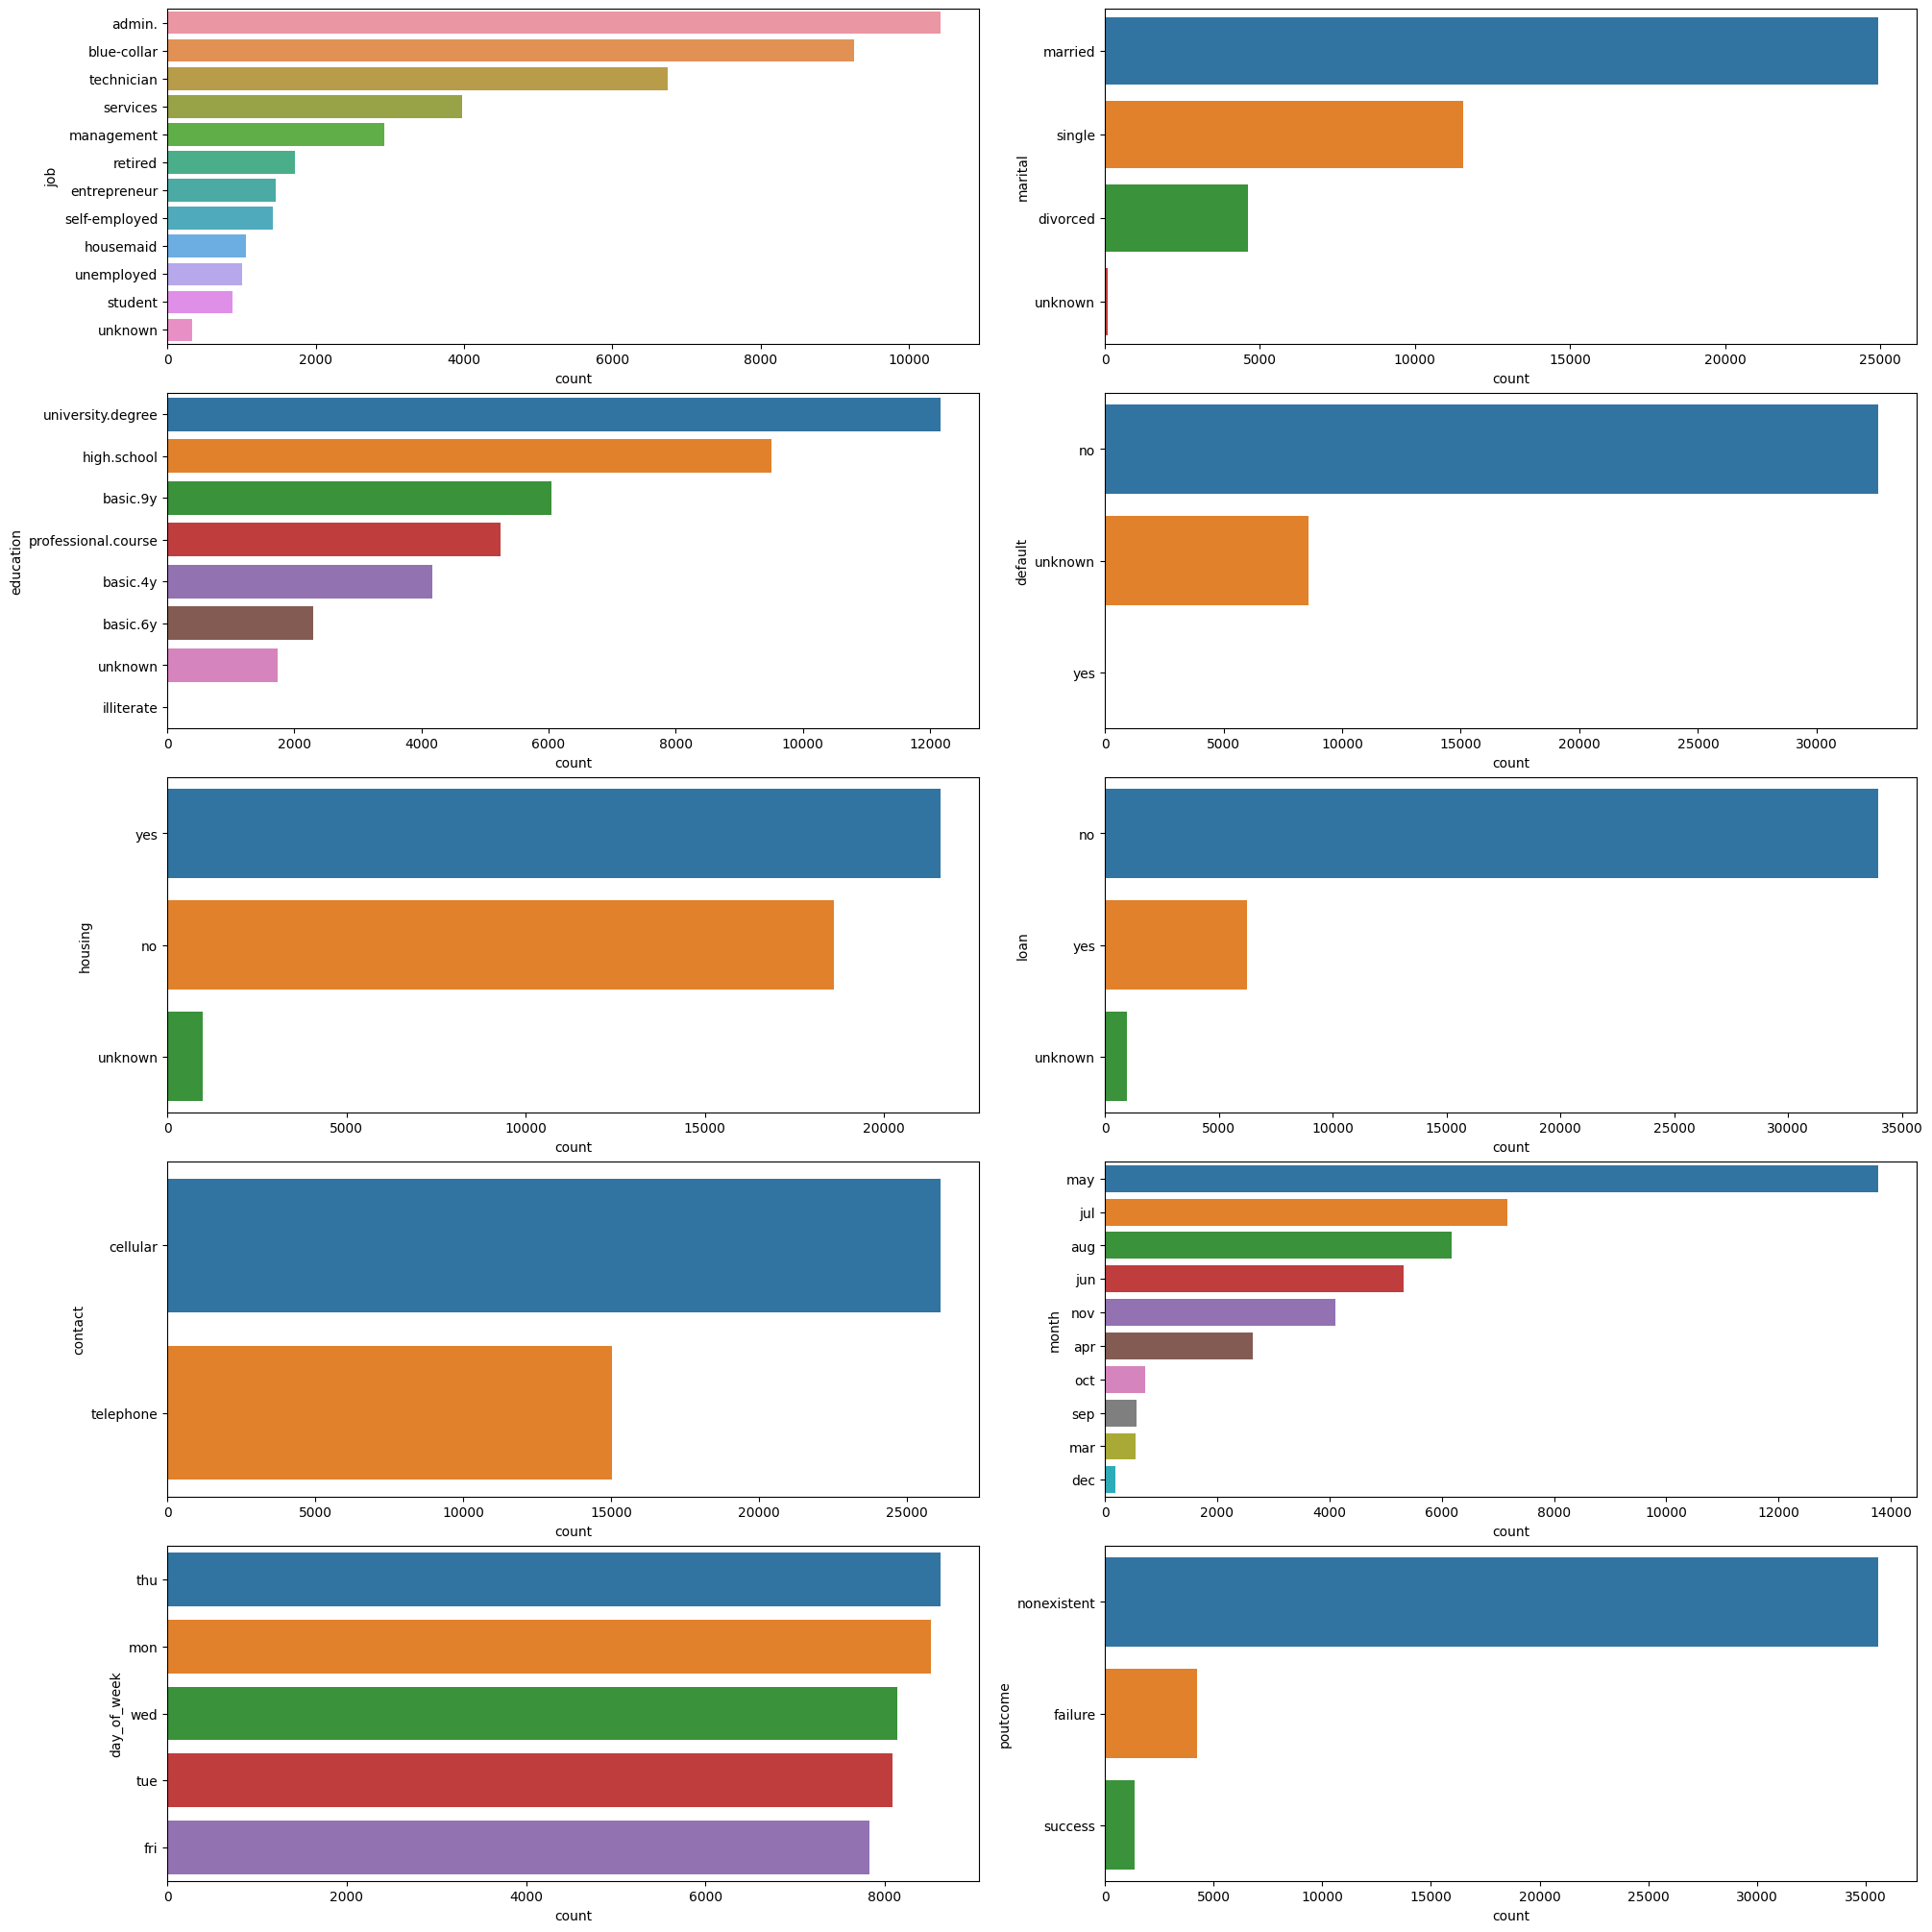

In [307]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
categorical = data2.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical[:-1]):
    sns.countplot(y=f, data=data2,
                  ax=axs[i//2][i % 2],
                  order=data2[f].value_counts().index)

Na osnovu histograma se može zaključiti da neke od kolona sadrže veoma mali broj primeraka određenih vrednosti kao i nedostajuće vrednosti. U nastavku možemo proveriti koliko tačno ovakvih vrednosti ima.

In [308]:
columns_with_unknown = ['job', 'housing',
                        'loan', 'default', 'marital', 'education']

for val in columns_with_unknown:
    print(f'Column {val}: \n')
    print((data2.groupby(val).size()/data2[val].count())*100)

Column job: 

job
admin.           25.303575
blue-collar      22.471828
entrepreneur      3.536040
housemaid         2.574315
management        7.101224
retired           4.172333
self-employed     3.451039
services          9.634253
student           2.125024
technician       16.366330
unemployed        2.462600
unknown           0.801438
dtype: float64
Column housing: 

housing
no         45.208374
unknown     2.404313
yes        52.387313
dtype: float64
Column loan: 

loan
no         82.421799
unknown     2.404313
yes        15.173888
dtype: float64
Column default: 

default
no         79.116476
unknown    20.876239
yes         0.007286
dtype: float64
Column marital: 

marital
divorced    11.198271
married     60.523120
single      28.084321
unknown      0.194288
dtype: float64
Column education: 

education
basic.4y               10.141830
basic.6y                5.563921
basic.9y               14.680882
high.school            23.100835
illiterate              0.043715
professional.

Zatim, možemo izvršiti vizuelizaciju raspodele vrednosti unutar numeričkih kolona

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

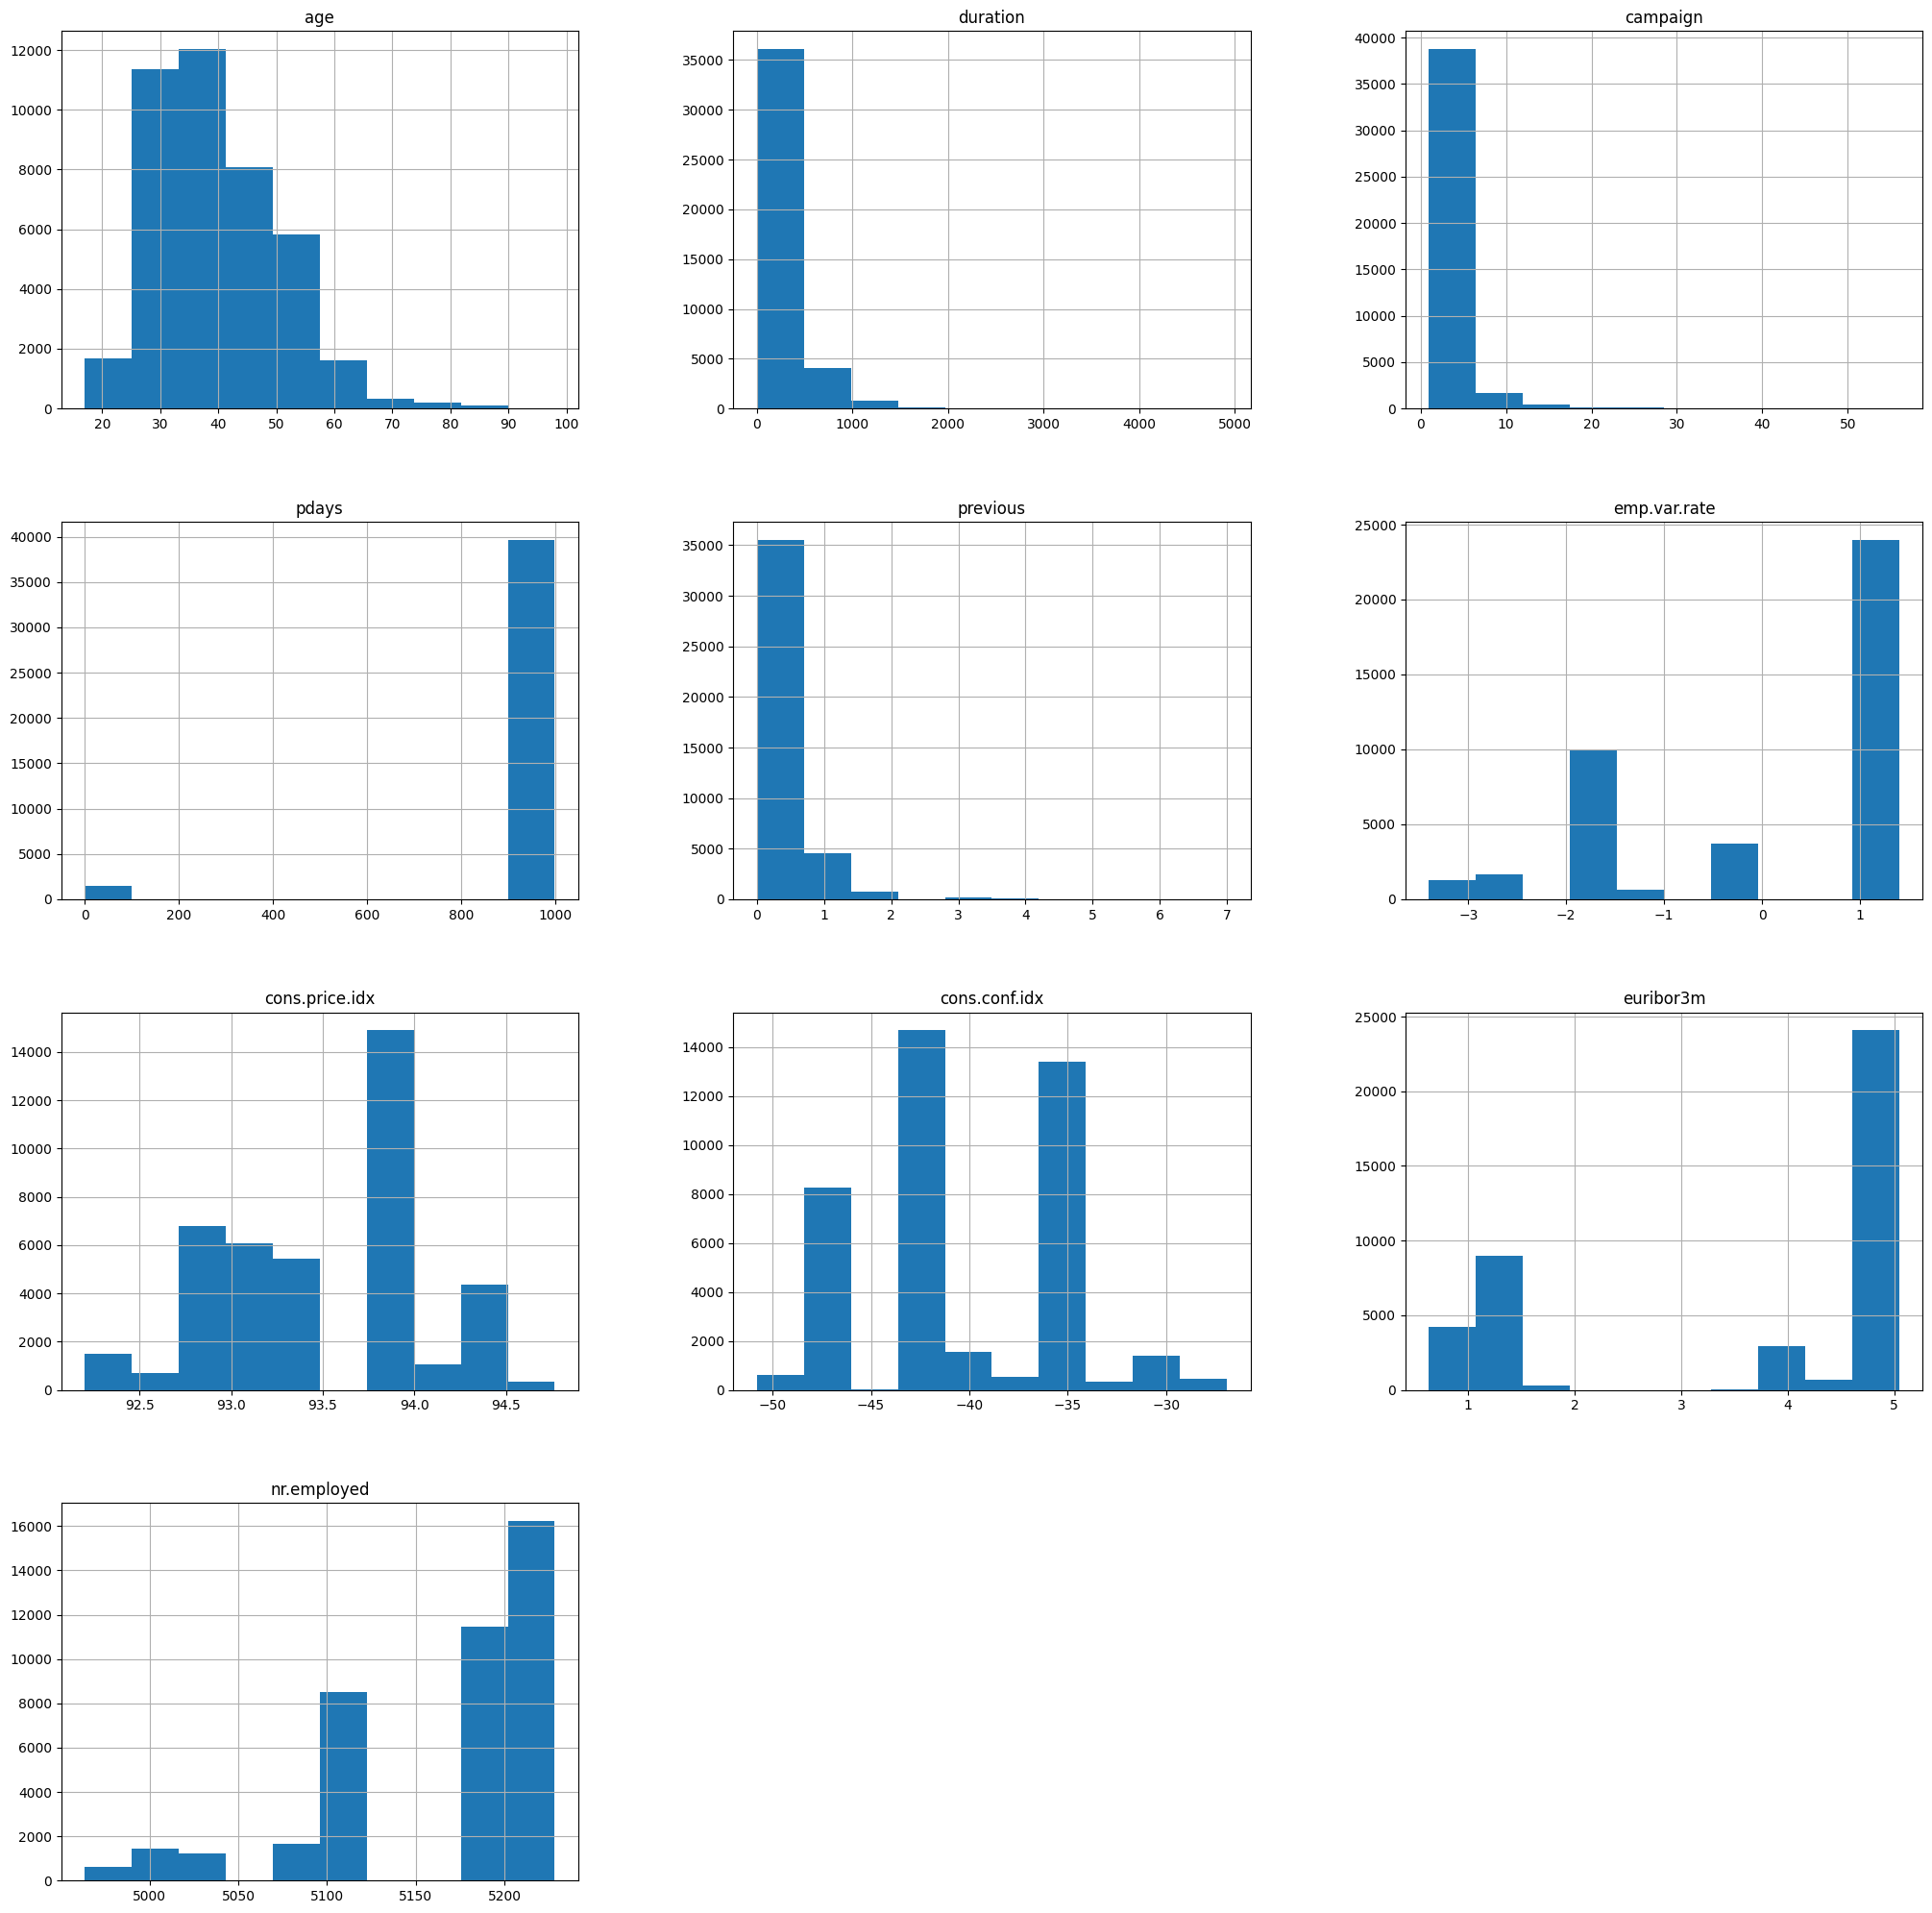

In [309]:
data2.hist(figsize = (25,25))

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

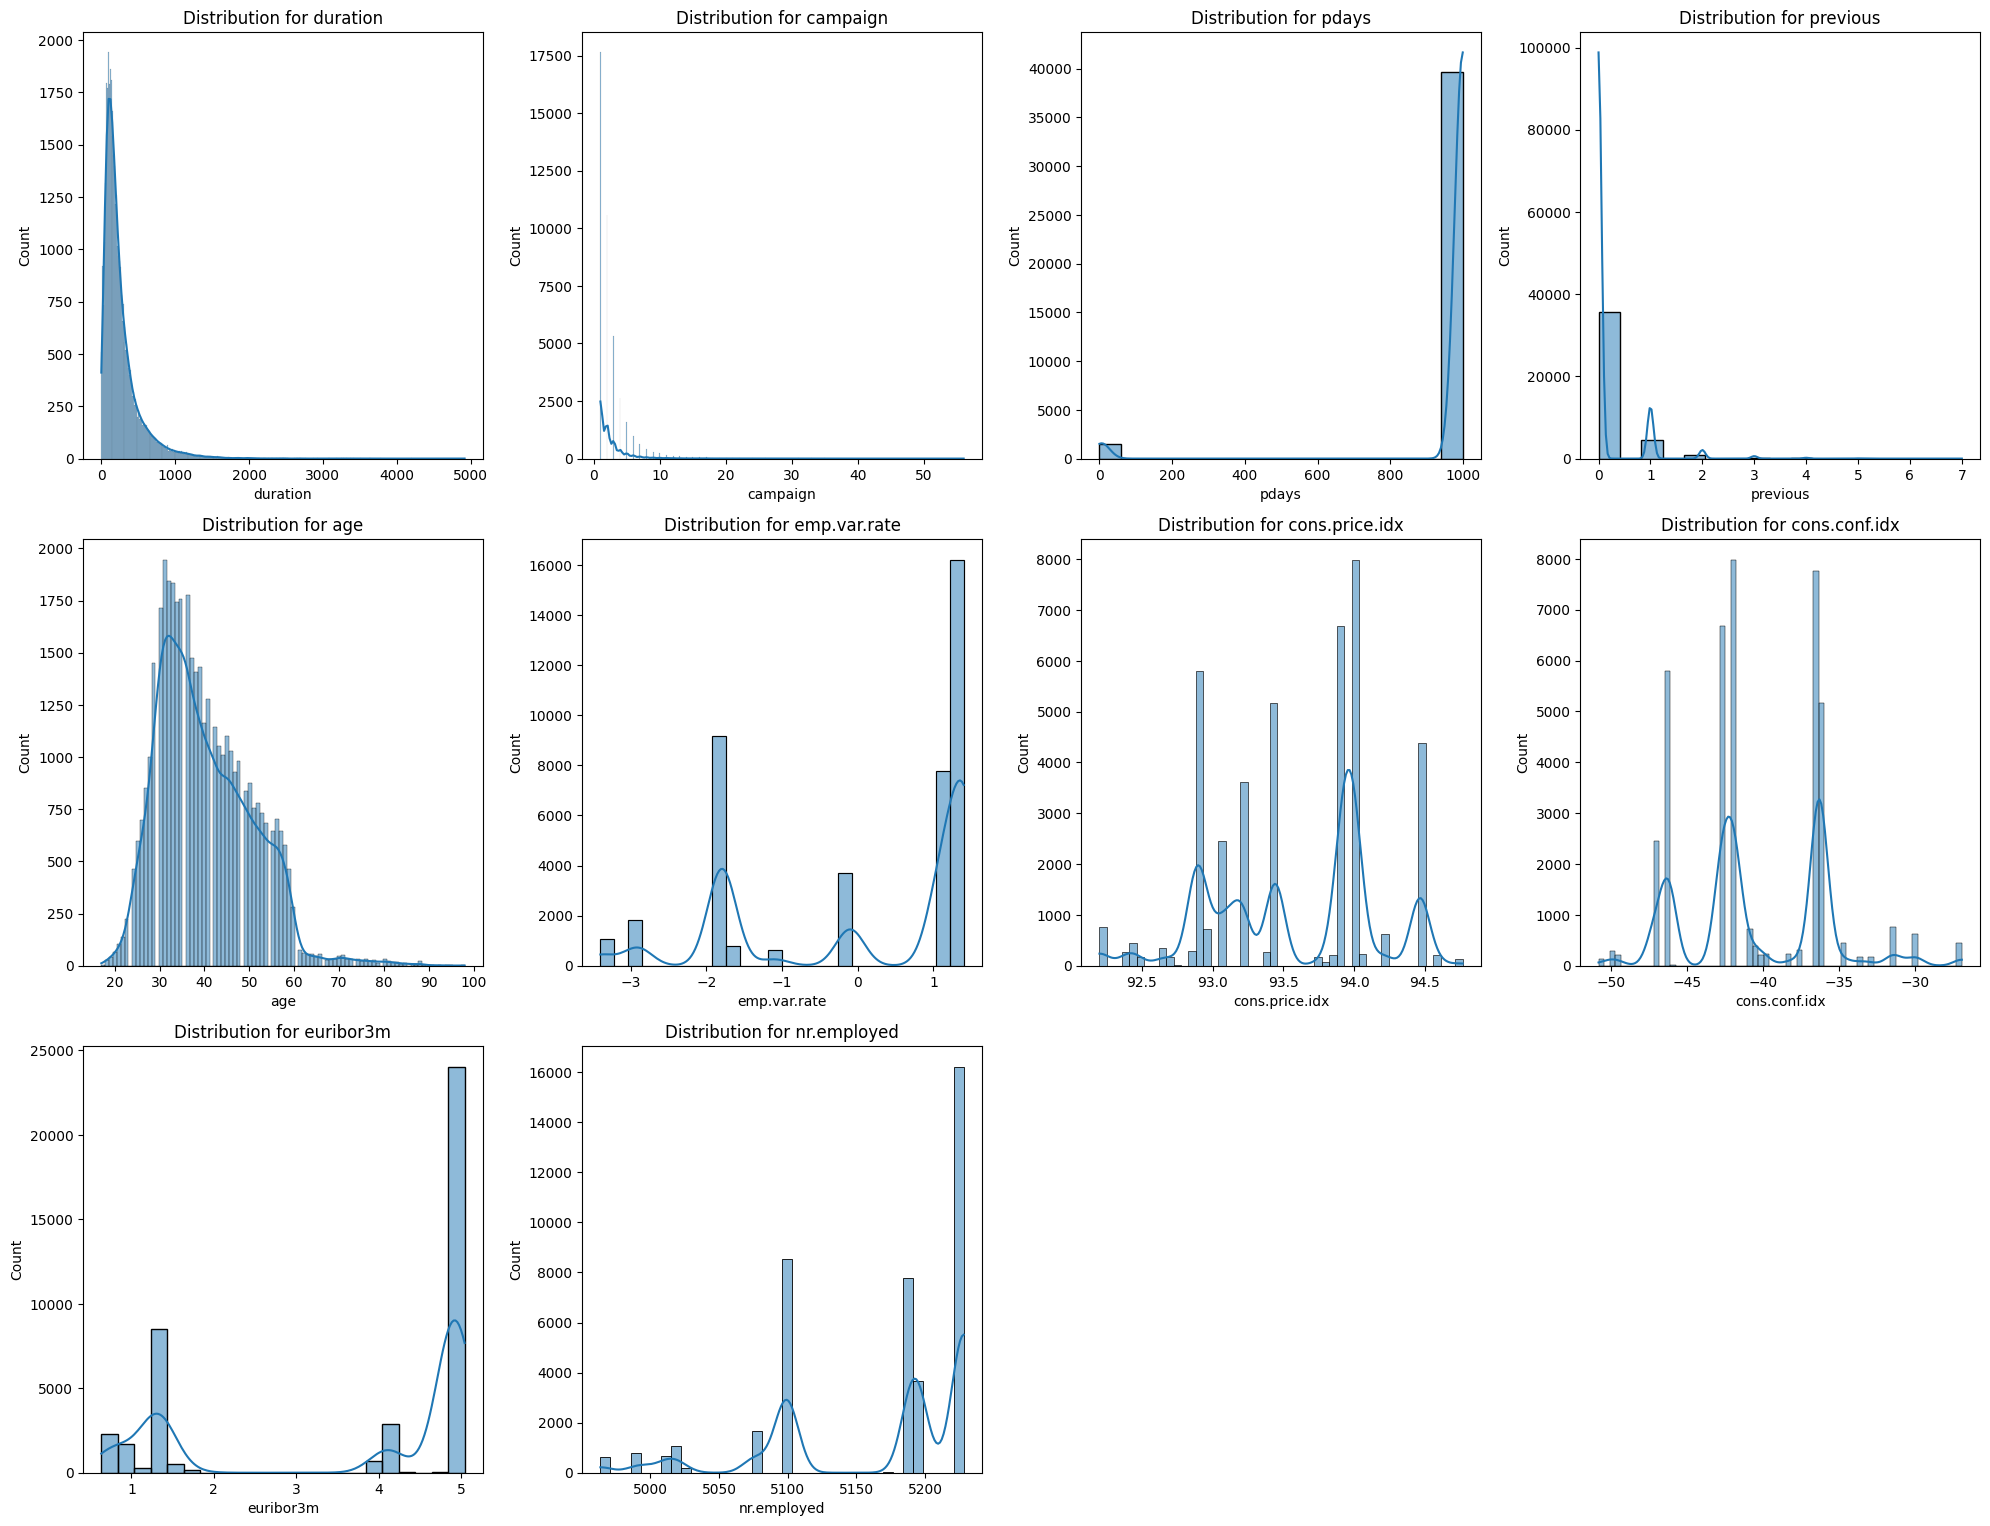

In [310]:
plt.figure(figsize=(20, 20)) 

for i, column in enumerate(numerical):
    plt.subplot(4, 4, i + 1)
    sns.histplot(x=data2[column], kde=True)
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

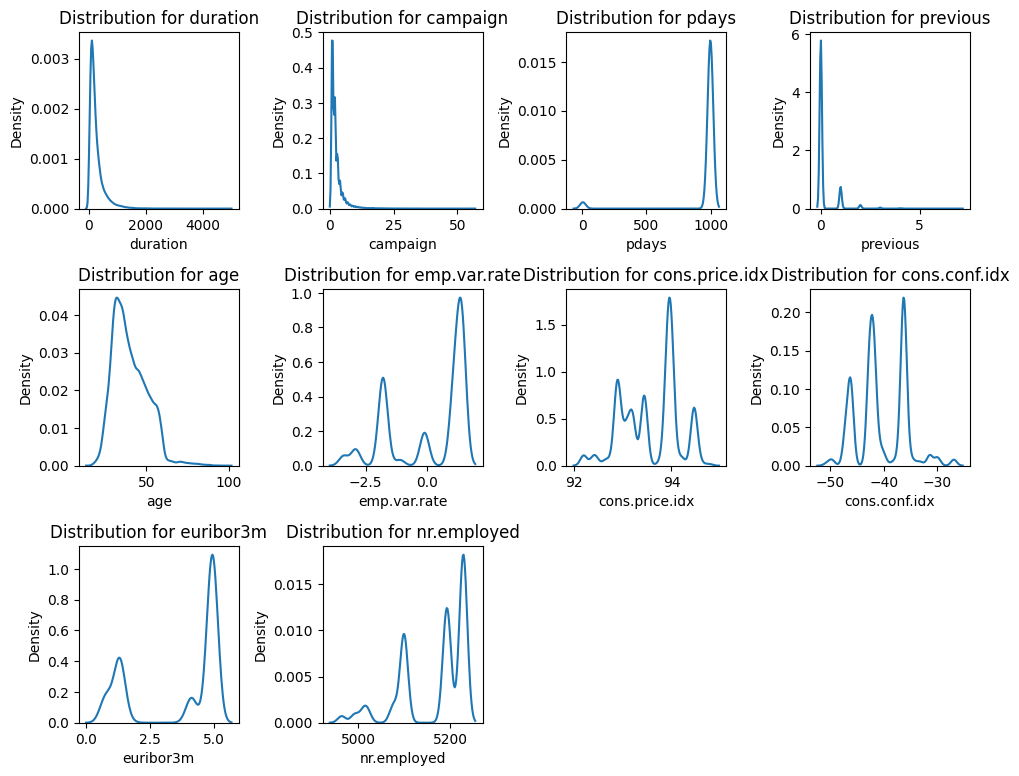

In [311]:
plt.figure(figsize=(10, 10))

for i, column in enumerate(numerical):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(x=data2[column])
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()

Primećujemo da neke od kolona kao što su duration, campaign, pdays i previous imaju veoma lošu raspodelu vrednosti, a da kolona age sadrži dosta primeraka van Gausovog zvona. Ovo možemo i dodatno proveriti korišćenjem boxplot dijagrama.

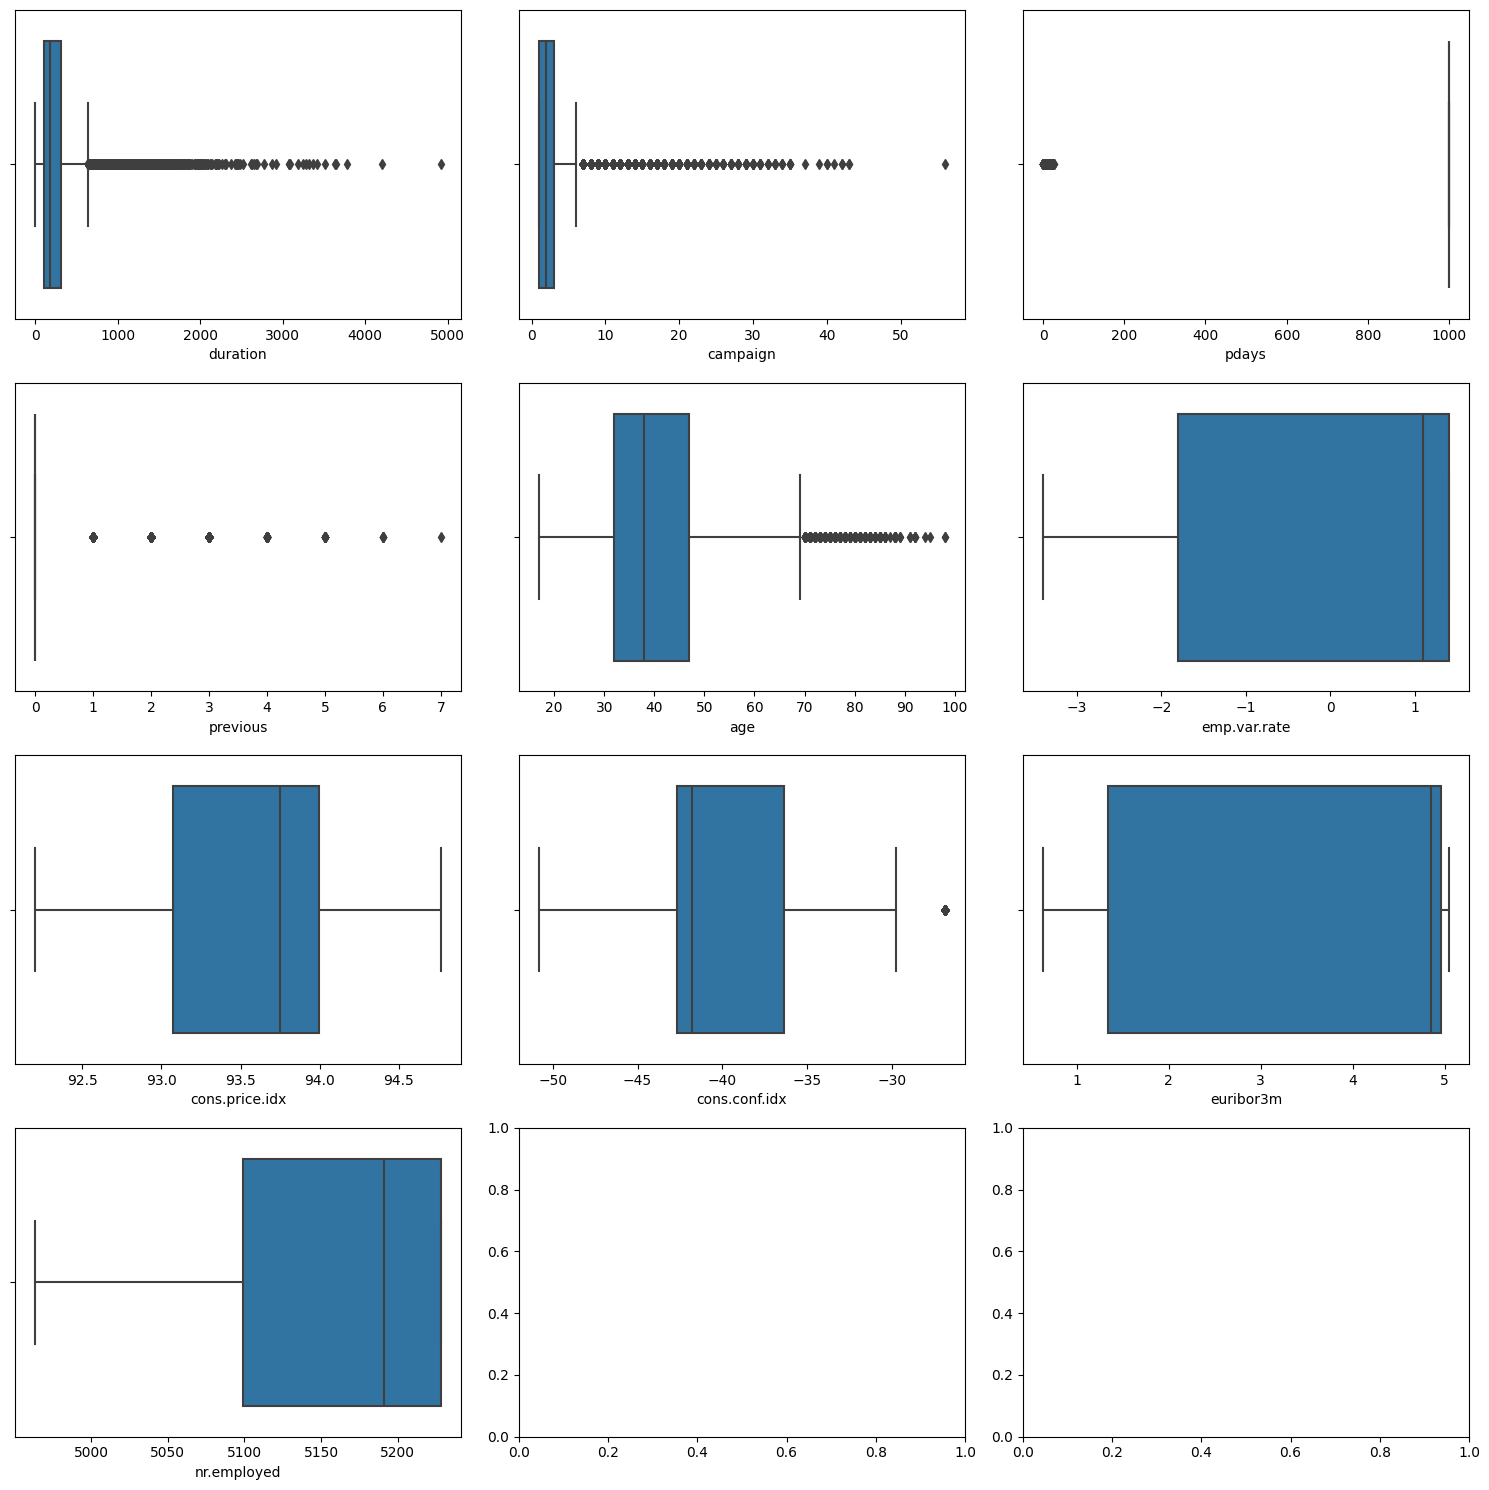

In [312]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for idx, column in enumerate(numerical):
    if column != 'y' and idx < 15:  
        sns.boxplot(x=data2[column], ax=axes[idx])
        
plt.tight_layout()
plt.show()

Na osnovu ovakvih raspodela, možemo zaključiti da će nad određenim kolonama verovatno biti potrebno primeniti različite transformacije

Za početak, možemo primetiti da kolona default skoro da nema nijedan primerak sa vrednošću yes, a gotovo svi ostali primerci (oko 80%) imaju nepoznate vrednosti. Zaključujemo da ova kolona, iz navedenih razloga, ne nosi nikakve informacije od značaja i zbog toga je možemo izbaciti.

In [313]:
data2 = data2.drop(columns=['default'])

Obzirom da kolona education ima veoma mali broj primeraka sa vrednošću illiterate, svim ovim primercima možemo pripisati vrednost basic.4y, jer je osnovno četvorogodišnje obrazovanje sledeći najbliži stepen obrazovanja.

In [314]:
data2.loc[data2['education'] == 'illiterate', 'education'] = 'basic.4y'

Kolona marital ima veoma mali broj primeraka sa nepoznatim vrednostima, pa zbog toga možemo izvršiti jednostavno izbacivanje.

In [315]:
data2 = data2.drop(data2[data2['marital'] == 'unknown'].index)

Što se ostalih kategoričkih kolona tiče, možemo izvršiti enkodiranje svih vrednosti

In [316]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data2['job'] = le.fit_transform(data2['job'])
unknown_job = le.transform(['unknown'])
data2['job'] = data2['job'].replace(unknown_job, np.nan)

In [317]:
le_edu = LabelEncoder()
data2['education'] = le_edu.fit_transform(data2['education'])
unknown_job = le_edu.transform(['unknown'])
data2['education'] = data2['education'].replace(unknown_job, np.nan)

In [318]:
data2['housing'] = data2['housing'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
data2['loan'] = data2['loan'].map({'unknown': np.nan, 'yes': 1, 'no': 0})
data2['y'] = data2['y'].map({'no': 0, 'yes': 1})
data2['marital'] = data2['marital'].map(
    {'married': 1, 'single': 0, 'divorced': 2})
data2['contact'] = data2['contact'].map({'cellular': 1, 'telephone': 0})

In [319]:
data2.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,1,0.0,0.0,0.0,0,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7.0,1,3.0,0.0,0.0,0,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7.0,1,3.0,1.0,0.0,0,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0.0,1,1.0,0.0,0.0,0,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7.0,1,3.0,0.0,1.0,0,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Za transformaciju pojedinih kolona možemo iskoristiti logaritamsku transformaciju. Ovaj vid transformacije je pogodno koristiti kada imamo lošu raspodelu vrednosti po nekim kolonama, kao što je to situacija za kolone campaign i duration.

In [320]:
for column in ['campaign', 'duration']:
    data2[column] = np.log1p(data2[column])

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


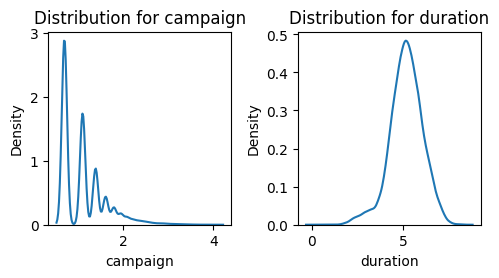

In [321]:
plt.figure(figsize=(10, 10))

columns_to_plot = ['campaign', 'duration']

for i, column in enumerate(columns_to_plot):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(x=data2[column])
    plt.title(f'Distribution for {column}')

plt.tight_layout()
plt.show()


In [322]:
data2['pdays'] = data2['pdays'].apply(lambda x: 0 if x == 999 else 1)
data2['previous'] = data2['previous'].apply(lambda x: 0 if x < 0.5 else 1)

Nad kolonama day_of_week i poutcome primenjujemo one-hot kodiranje.

In [323]:
data2 = pd.get_dummies(
    data=data2, columns=['day_of_week', 'poutcome'])

data2.head()

,age,job,marital,education,housing,loan,contact,month,duration,campaign,...,nr.employed,y,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,3.0,1,0.0,0.0,0.0,0,may,5.568345,0.693147,...,5191.0,0,False,True,False,False,False,False,True,False
1,57,7.0,1,3.0,0.0,0.0,0,may,5.010635,0.693147,...,5191.0,0,False,True,False,False,False,False,True,False
2,37,7.0,1,3.0,1.0,0.0,0,may,5.424950,0.693147,...,5191.0,0,False,True,False,False,False,False,True,False
3,40,0.0,1,1.0,0.0,0.0,0,may,5.023881,0.693147,...,5191.0,0,False,True,False,False,False,False,True,False
4,56,7.0,1,3.0,0.0,1.0,0,may,5.730100,0.693147,...,5191.0,0,False,True,False,False,False,False,True,False


In [324]:
data2 = pd.get_dummies(
    data=data2, columns=['job', 'education'])

data2.head()

,age,marital,housing,loan,contact,month,duration,campaign,pdays,previous,...,job_7.0,job_8.0,job_9.0,job_10.0,education_0.0,education_1.0,education_2.0,education_3.0,education_4.0,education_5.0
0,56,1,0.0,0.0,0,may,5.568345,0.693147,0,0,...,False,False,False,False,True,False,False,False,False,False
1,57,1,0.0,0.0,0,may,5.010635,0.693147,0,0,...,True,False,False,False,False,False,False,True,False,False
2,37,1,1.0,0.0,0,may,5.424950,0.693147,0,0,...,True,False,False,False,False,False,False,True,False,False
3,40,1,0.0,0.0,0,may,5.023881,0.693147,0,0,...,False,False,False,False,False,True,False,False,False,False
4,56,1,0.0,1.0,0,may,5.730100,0.693147,0,0,...,True,False,False,False,False,False,False,True,False,False


In [325]:
data2 = data2.drop(columns=['poutcome_nonexistent'])
data2 = data2.drop(columns=['month'])

In [326]:
data2.dtypes

age                   int64
marital               int64
housing             float64
loan                float64
contact               int64
duration            float64
campaign            float64
pdays                 int64
previous              int64
emp.var.rate        float64
cons.price.idx      float64
cons.conf.idx       float64
euribor3m           float64
nr.employed         float64
y                     int64
day_of_week_fri        bool
day_of_week_mon        bool
day_of_week_thu        bool
day_of_week_tue        bool
day_of_week_wed        bool
poutcome_failure       bool
poutcome_success       bool
job_0.0                bool
job_1.0                bool
job_2.0                bool
job_3.0                bool
job_4.0                bool
job_5.0                bool
job_6.0                bool
job_7.0                bool
job_8.0                bool
job_9.0                bool
job_10.0               bool
education_0.0          bool
education_1.0          bool
education_2.0       

In [327]:
data2.mean(numeric_only=True)

age                   40.023311
marital                0.830811
housing                0.536964
loan                   0.155484
contact                0.634660
duration               5.172823
campaign               1.118909
pdays                  0.036743
previous               0.136437
emp.var.rate           0.082512
cons.price.idx        93.575923
cons.conf.idx        -40.502246
euribor3m              3.621894
nr.employed         5167.053638
y                      0.112590
day_of_week_fri        0.190140
day_of_week_mon        0.206662
day_of_week_thu        0.209120
day_of_week_tue        0.196491
day_of_week_wed        0.197586
poutcome_failure       0.103149
poutcome_success       0.033288
job_0.0                0.253188
job_1.0                0.224815
job_2.0                0.035356
job_3.0                0.025720
job_4.0                0.071077
job_5.0                0.041683
job_6.0                0.034456
job_7.0                0.096384
job_8.0                0.021267
job_9.0 

In [328]:
data2.median(numeric_only=True)

age                   38.000000
marital                1.000000
housing                1.000000
loan                   0.000000
contact                1.000000
duration               5.198497
campaign               1.098612
pdays                  0.000000
previous               0.000000
emp.var.rate           1.100000
cons.price.idx        93.749000
cons.conf.idx        -41.800000
euribor3m              4.857000
nr.employed         5191.000000
y                      0.000000
day_of_week_fri        0.000000
day_of_week_mon        0.000000
day_of_week_thu        0.000000
day_of_week_tue        0.000000
day_of_week_wed        0.000000
poutcome_failure       0.000000
poutcome_success       0.000000
job_0.0                0.000000
job_1.0                0.000000
job_2.0                0.000000
job_3.0                0.000000
job_4.0                0.000000
job_5.0                0.000000
job_6.0                0.000000
job_7.0                0.000000
job_8.0                0.000000
job_9.0 

In [329]:
data2.mode(axis=0).head(1)

,age,marital,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,job_7.0,job_8.0,job_9.0,job_10.0,education_0.0,education_1.0,education_2.0,education_3.0,education_4.0,education_5.0
0,31.0,1.0,1.0,0.0,1.0,4.454347,0.693147,0.0,0.0,1.4,...,False,False,False,False,False,False,False,False,False,False


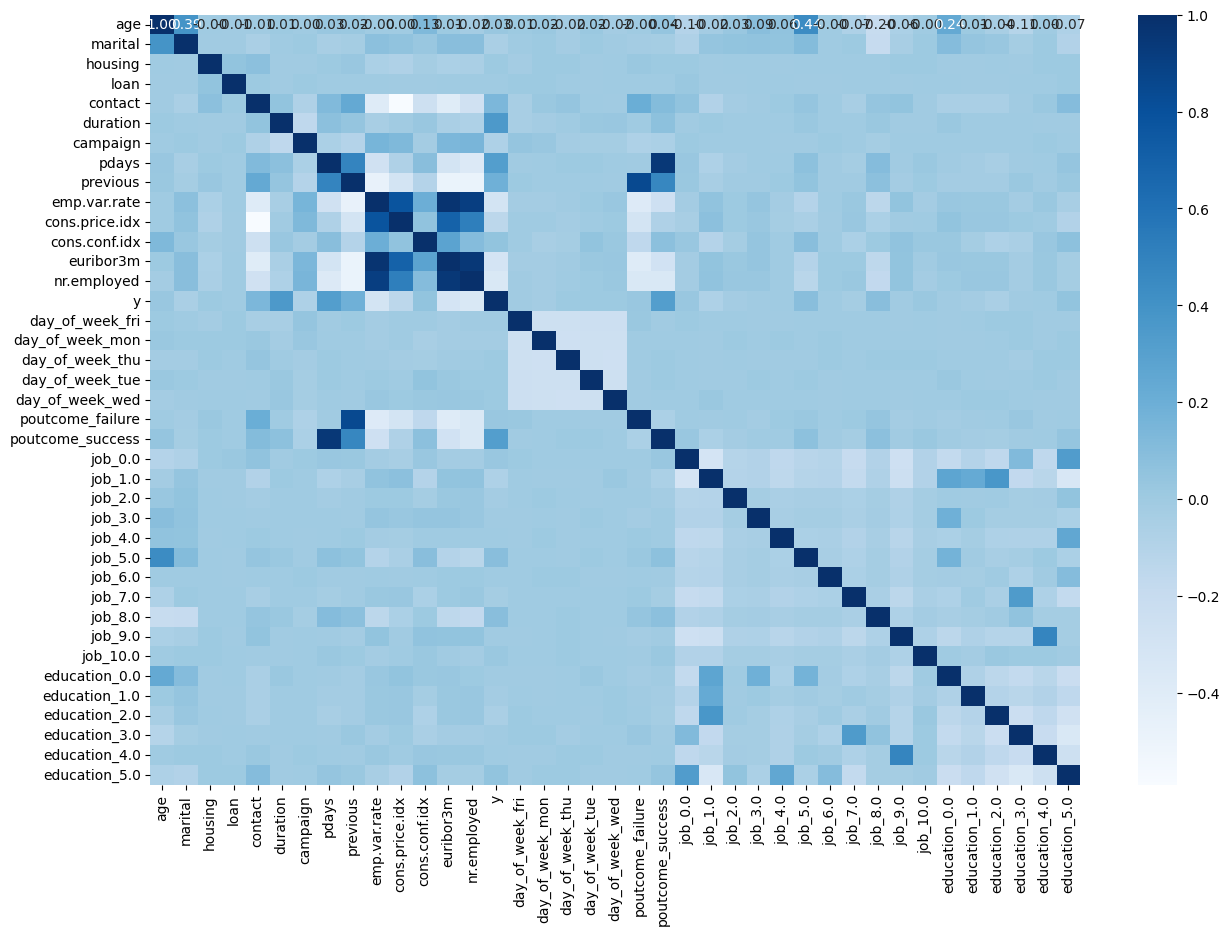

In [330]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data2.corr().round(2), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")
plt.show()


Na osnovu korelacione matrice možemo primetiti da određene kolone imaju korelaciju skoro 1.0, što ukazuje na njihovu međusobnu zavisnost. Neke od njih su: emp.var.rate, nr.employed i eurobor3m. Zbog toga moguće je otkloniti navedene kolone iz dataset-a i ostaviti samo jednu.

In [331]:
data2 = data2.drop(columns=['emp.var.rate', 'nr.employed'])

In [332]:
data2.var(numeric_only=True).round(2).sort_values()

job_10.0              0.02
job_8.0               0.02
job_6.0               0.03
job_3.0               0.03
job_2.0               0.03
poutcome_success      0.03
pdays                 0.04
job_5.0               0.04
education_1.0         0.05
job_4.0               0.07
job_7.0               0.09
poutcome_failure      0.09
education_0.0         0.09
y                     0.10
education_4.0         0.11
previous              0.12
loan                  0.13
education_2.0         0.13
job_9.0               0.14
day_of_week_fri       0.15
day_of_week_mon       0.16
day_of_week_tue       0.16
day_of_week_wed       0.16
day_of_week_thu       0.17
job_1.0               0.17
education_3.0         0.18
job_0.0               0.19
education_5.0         0.21
contact               0.23
campaign              0.24
housing               0.25
cons.price.idx        0.33
marital               0.36
duration              0.84
euribor3m             3.01
cons.conf.idx        21.41
age                 108.58
d

In [333]:
data2.std(numeric_only=True).round(2).sort_values()

job_8.0              0.14
job_10.0             0.15
job_3.0              0.16
job_6.0              0.18
job_2.0              0.18
poutcome_success     0.18
pdays                0.19
job_5.0              0.20
education_1.0        0.23
job_4.0              0.26
job_7.0              0.30
poutcome_failure     0.30
education_0.0        0.30
y                    0.32
education_4.0        0.33
previous             0.34
education_2.0        0.35
loan                 0.36
job_9.0              0.37
day_of_week_fri      0.39
day_of_week_mon      0.40
day_of_week_tue      0.40
day_of_week_wed      0.40
day_of_week_thu      0.41
job_1.0              0.42
education_3.0        0.42
job_0.0              0.43
education_5.0        0.46
contact              0.48
campaign             0.49
housing              0.50
cons.price.idx       0.58
marital              0.60
duration             0.92
euribor3m            1.73
cons.conf.idx        4.63
age                 10.42
dtype: float64